# Environment Setup

In [1]:
!pip install missingno

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.core.interactiveshell import InteractiveShell
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA    

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
# display scientific notation as a float
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# InteractiveShell.ast_node_interactivity = "all"

# plt.rcParams["figure.autolayout"] = True
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", rc=custom_params, palette="Set2")

# Part 0: Data Exploration

In [3]:
filename = "./src/Medical Data/medical_raw_data.csv"
df = pd.read_csv(filename)

In [12]:
df.dtypes
print(df.shape, end="\n\n")
print(df.columns, end="\n\n")
print(df.index, end="\n\n")
df.info()

(10000, 53)

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

RangeIndex(start=0, stop=10000, step=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  ----- 

In [13]:
df.head() 

Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1           2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2           3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3           4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4           5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

     Lat     Lng  Population      Area          Timezone  \
0 34.350 -86.725        2951  Suburban   America/Chicago   
1 30.845 -85.229       11303     Urban   America/Chicago   
2 43.543 -96.638       17125  Suburban   America/Chicago   
3 43.897 -93.515        2162  Suburban   America/Chicago   
4 37.599 -76.890        5287     Rural  America/New_York   

                                Job  Children    Age  \
0  Psychologist, sport and exercise     1.000 53.000   
1      Community development worker     3.000 51.000   
2           Chief Executive Officer     3.000 53.000   
3               Early years teacher     0.000 78.000   
4       Health promotion specialist       NaN 22.000   

                                  Education Employment    Income   Marital  \
0            Some College, Less than 1 Year  Full Time 86575.930  Divorced   
1  Some College, 1 or More Years, No Degree  Full Time 46805.990   Married   
2  Some College, 1 or More Years, No Degree    Retired 14370.140   Widowed   
3             GED or Alternative Credential    Retired 39741.490   Married   
4               Regular High School Diploma  Full Time  1209.560   Widowed   

   Gender ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  VitD_supp  \
0    Male      No       17.802           6                 0          0   
1  Female      No       18.995           4                 2          1   
2  Female      No       17.416           4                 1          0   
3    Male      No       17.420           4                 1          0   
4  Female      No       16.871           5                 0          2   

  Soft_drink        Initial_admin HighBlood Stroke Complication_risk  \
0        NaN  Emergency Admission       Yes     No            Medium   
1         No  Emergency Admission       Yes     No              High   
2         No   Elective Admission       Yes     No            Medium   
3         No   Elective Admission        No    Yes            Medium   
4        Yes   Elective Admission        No     No               Low   

   Overweight Arthritis Diabetes Hyperlipidemia BackPain  Anxiety  \
0       0.000       Yes      Yes             No      Yes    1.000   
1       1.000        No       No             No       No      NaN   
2       1.000        No      Yes             No       No      NaN   
3       0.000       Yes       No             No       No      NaN   
4       0.000        No       No            Yes       No    0.000   

  Allergic_rhinitis Reflux_esophagitis Asthma     Services  Initial_days  \
0               Yes                 No    Yes   Blood Work        10.586   
1                No                Yes     No  Intravenous        15.130   
2                No                 No     No   Blood Work         4.772   
3                No                Yes    Yes   Blood Work         1.715   
4               Yes                 No     No      CT Scan         1.255   

   TotalCharge  Additional_charges  Item1  Item2  Item3  Item4  Item5  Item6  \
0     3191.049           17939.403      3      3  

In [6]:
df.describe()

Unnamed: 0  CaseOrder       Zip       Lat       Lng  Population  \
count   10000.000  10000.000 10000.000 10000.000 10000.000   10000.000   
mean     5000.500   5000.500 50159.324    38.751   -91.243    9965.254   
std      2886.896   2886.896 27469.588     5.403    15.206   14824.759   
min         1.000      1.000   610.000    17.967  -174.210       0.000   
25%      2500.750   2500.750 27592.000    35.255   -97.353     694.750   
50%      5000.500   5000.500 50207.000    39.419   -88.397    2769.000   
75%      7500.250   7500.250 72411.750    42.044   -80.438   13945.000   
max     10000.000  10000.000 99929.000    70.561   -65.290  122814.000   

       Children      Age     Income  VitD_levels  Doc_visits  \
count  7412.000 7586.000   7536.000    10000.000   10000.000   
mean      2.098   53.296  40484.438       19.413       5.012   
std       2.155   20.659  28664.861        6.723       1.046   
min       0.000   18.000    154.080        9.519       1.000   
25%       0.000   35.000  19450.792       16.513       4.000   
50%       1.000   53.000  33942.280       18.081       5.000   
75%       3.000   71.000  54075.235       19.790       6.000   
max      10.000   89.000 207249.130       53.019       9.000   

       Full_meals_eaten  VitD_supp  Overweight  Anxiety  Initial_days  \
count         10000.000  10000.000    9018.000 9016.000      8944.000   
mean              1.001      0.399       0.709    0.322        34.432   
std               1.008      0.629       0.454    0.467        26.287   
min               0.000      0.000       0.000    0.000         1.002   
25%               0.000      0.000       0.000    0.000         7.912   
50%               1.000      0.000       1.000    0.000        34.447   
75%               2.000      1.000       1.000    1.000        61.125   
max               7.000      5.000       1.000    1.000        71.981   

       TotalCharge  Additional_charges     Item1     Item2     Item3  \
count    10000.000           10000.000 10000.000 10000.000 10000.000   
mean      5891.538           12934.529     3.519     3.507     3.511   
std       3377.558            6542.602     1.032     1.035     1.033   
min       1256.752            3125.703     1.000     1.000     1.000   
25%       3253.239            7986.488     3.000     3.000     3.000   
50%       5852.251           11573.979     4.000     3.000     4.000   
75%       7614.990           15626.491     4.000     4.000     4.000   
max      21524.224           30566.073     8.000     7.000     8.000   

          Item4     Item5     Item6     Item7     Item8  
count 10000.000 10000.000 10000.000 10000.000 10000.000  
mean      3.515     3.497     3.522     3.494     3.510  
std       1.036     1.030     1.032     1.021     1.042  
min       1.000     1.000     1.000     1.000     1.000  
25%       3.000     3.000     3.000     3.000     3.000  
50%       4.000     3.000     4.000     3.000     3.000  
75%       4.000     4.000     4.000     4.000     4.000  
max       7.000     7.000     7.000     7.000     7.000

### Missing Values

In [7]:
(df.isna().sum()/len(df) * 100).sort_values(ascending=False)

Children             25.880
Soft_drink           24.670
Income               24.640
Age                  24.140
Initial_days         10.560
Anxiety               9.840
Overweight            9.820
Stroke                0.000
Complication_risk     0.000
Arthritis             0.000
Diabetes              0.000
Hyperlipidemia        0.000
BackPain              0.000
Allergic_rhinitis     0.000
Unnamed: 0            0.000
HighBlood             0.000
Asthma                0.000
Services              0.000
TotalCharge           0.000
Additional_charges    0.000
Item1                 0.000
Item2                 0.000
Item3                 0.000
Item4                 0.000
Item5                 0.000
Item6                 0.000
Item7                 0.000
Reflux_esophagitis    0.000
VitD_supp             0.000
Initial_admin         0.000
CaseOrder             0.000
Customer_id           0.000
Interaction           0.000
UID                   0.000
City                  0.000
State               

# Part I: Research Question
---

## A. Question or Decision ✅

**Describe one question or decision that you will address using the data set you chose. The summarized question or decision must be relevant to a realistic organizational need or situation.**

To understand where to focus readmission reduction efforts for the Acme Hospital Chain. The Analyst team is tasked with researching what relationship(s) exists between readmitted patients and their Geographical Area type (rural, urban, suburban)?

## B. Required Variables ✅
Describe the variables in the data set and indicate the specific type of data being described. Use examples from the data set that support your claims.**

In [8]:
# merges datatypes with sample data
# see "D206 Data Cleaning_ Medical Data Considerations and Dictionary" for feature descriptions
df_tp = df.head(1).transpose()

# store the value's python data type
df_tp["Python Data Type"] = df_tp[0].apply(type)

# store the value's pandas data type
df_tp["Pandas Data Type"] = df.dtypes

# rename cols
df_tp = df_tp.reset_index().rename(columns={'index':'Feature', 0: "Sample Value"})

# reorder columns
df_tp.reindex(columns=["Feature", "Pandas Data Type", "Python Data Type", "Sample Value"])

Feature Pandas Data Type Python Data Type  \
0           Unnamed: 0            int64    <class 'int'>   
1            CaseOrder            int64    <class 'int'>   
2          Customer_id           object    <class 'str'>   
3          Interaction           object    <class 'str'>   
4                  UID           object    <class 'str'>   
5                 City           object    <class 'str'>   
6                State           object    <class 'str'>   
7               County           object    <class 'str'>   
8                  Zip            int64    <class 'int'>   
9                  Lat          float64  <class 'float'>   
10                 Lng          float64  <class 'float'>   
11          Population            int64    <class 'int'>   
12                Area           object    <class 'str'>   
13            Timezone           object    <class 'str'>   
14                 Job           object    <class 'str'>   
15            Children          float64  <class 'float'>   
16                 Age          float64  <class 'float'>   
17           Education           object    <class 'str'>   
18          Employment           object    <class 'str'>   
19              Income          float64  <class 'float'>   
20             Marital           object    <class 'str'>   
21              Gender           object    <class 'str'>   
22             ReAdmis           object    <class 'str'>   
23         VitD_levels          float64  <class 'float'>   
24          Doc_visits            int64    <class 'int'>   
25    Full_meals_eaten            int64    <class 'int'>   
26           VitD_supp            int64    <class 'int'>   
27          Soft_drink           object  <class 'float'>   
28       Initial_admin           object    <class 'str'>   
29           HighBlood           object    <class 'str'>   
30              Stroke           object    <class 'str'>   
31   Complication_risk           object    <class 'str'>   
32          Overweight          float64  <class 'float'>   
33           Arthritis           object    <class 'str'>   
34            Diabetes           object    <class 'str'>   
35      Hyperlipidemia           object    <class 'str'>   
36            BackPain           object    <class 'str'>   
37             Anxiety          float64  <class 'float'>   
38   Allergic_rhinitis           object    <class 'str'>   
39  Reflux_esophagitis           object    <class 'str'>   
40              Asthma           object    <class 'str'>   
41            Services           object    <class 'str'>   
42        Initial_days          float64  <class 'float'>   
43         TotalCharge          float64  <class 'float'>   
44  Additional_charges          float64  <class 'float'>   
45               Item1            int64    <class 'int'>   
46               Item2            int64    <class 'int'>   
47               Item3            int64    <class 'int'>   
48               Item4            int64    <class 'int'>   
49               Item5            int64    <class 'int'>   
50               Item6            int64    <class 'int'>   
51               Item7            int64    <class 'int'>   
52               Item8            int64    <class 'int'>   

                            Sample Value  
0                                      1  
1                                      1  
2                                C412403  
3   8cd49b13-f45a-4b47-a2bd-173ffa932c2f  
4       3a83ddb66e2ae73798bdf1d705dc0932  
5                                    Eva  
6                                     AL  
7                                 Morgan  
8                                  35621  
9                                 34.350  
10                               -86.725  
11                                  2951  
12                              Suburban  
13                       America/Chicago  
14      Psychologist, sport and exercise  
15                                 1.000  
16                                53.000  


# Part II: Data-Cleaning Plan
---

Explain the plan for cleaning the data by doing the following:
 1. Examine the entire dataset (regardless of your research question).
 2. Detection and Treatment of Duplicates, Missing Values and Outlier (check for outliers for all numeric variables).
 3. Re express Categorical Variables, if possible (this is optional, but suggested)
 4. Perform PCA (with numerical variables only)

## C1: Plan to Find Anomalies
Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set.

### Understanding the dataset

In [9]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [14]:
display(df.columns)
display(df.describe())
df.head()

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

Unnamed: 0  CaseOrder       Zip       Lat       Lng  Population  \
count   10000.000  10000.000 10000.000 10000.000 10000.000   10000.000   
mean     5000.500   5000.500 50159.324    38.751   -91.243    9965.254   
std      2886.896   2886.896 27469.588     5.403    15.206   14824.759   
min         1.000      1.000   610.000    17.967  -174.210       0.000   
25%      2500.750   2500.750 27592.000    35.255   -97.353     694.750   
50%      5000.500   5000.500 50207.000    39.419   -88.397    2769.000   
75%      7500.250   7500.250 72411.750    42.044   -80.438   13945.000   
max     10000.000  10000.000 99929.000    70.561   -65.290  122814.000   

       Children      Age     Income  VitD_levels  Doc_visits  \
count  7412.000 7586.000   7536.000    10000.000   10000.000   
mean      2.098   53.296  40484.438       19.413       5.012   
std       2.155   20.659  28664.861        6.723       1.046   
min       0.000   18.000    154.080        9.519       1.000   
25%       0.000   35.000  19450.792       16.513       4.000   
50%       1.000   53.000  33942.280       18.081       5.000   
75%       3.000   71.000  54075.235       19.790       6.000   
max      10.000   89.000 207249.130       53.019       9.000   

       Full_meals_eaten  VitD_supp  Overweight  Anxiety  Initial_days  \
count         10000.000  10000.000    9018.000 9016.000      8944.000   
mean              1.001      0.399       0.709    0.322        34.432   
std               1.008      0.629       0.454    0.467        26.287   
min               0.000      0.000       0.000    0.000         1.002   
25%               0.000      0.000       0.000    0.000         7.912   
50%               1.000      0.000       1.000    0.000        34.447   
75%               2.000      1.000       1.000    1.000        61.125   
max               7.000      5.000       1.000    1.000        71.981   

       TotalCharge  Additional_charges     Item1     Item2     Item3  \
count    10000.000           10000.000 10000.000 10000.000 10000.000   
mean      5891.538           12934.529     3.519     3.507     3.511   
std       3377.558            6542.602     1.032     1.035     1.033   
min       1256.752            3125.703     1.000     1.000     1.000   
25%       3253.239            7986.488     3.000     3.000     3.000   
50%       5852.251           11573.979     4.000     3.000     4.000   
75%       7614.990           15626.491     4.000     4.000     4.000   
max      21524.224           30566.073     8.000     7.000     8.000   

          Item4     Item5     Item6     Item7     Item8  
count 10000.000 10000.000 10000.000 10000.000 10000.000  
mean      3.515     3.497     3.522     3.494     3.510  
std       1.036     1.030     1.032     1.021     1.042  
min       1.000     1.000     1.000     1.000     1.000  
25%       3.000     3.000     3.000     3.000     3.000  
50%       4.000     3.000     4.000     3.000     3.000  
75%       4.000     4.000     4.000     4.000     4.000  
max       7.000     7.000     7.000     7.000     7.000

Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1           2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2           3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3           4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4           5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

     Lat     Lng  Population      Area          Timezone  \
0 34.350 -86.725        2951  Suburban   America/Chicago   
1 30.845 -85.229       11303     Urban   America/Chicago   
2 43.543 -96.638       17125  Suburban   America/Chicago   
3 43.897 -93.515        2162  Suburban   America/Chicago   
4 37.599 -76.890        5287     Rural  America/New_York   

                                Job  Children    Age  \
0  Psychologist, sport and exercise     1.000 53.000   
1      Community development worker     3.000 51.000   
2           Chief Executive Officer     3.000 53.000   
3               Early years teacher     0.000 78.000   
4       Health promotion specialist       NaN 22.000   

                                  Education Employment    Income   Marital  \
0            Some College, Less than 1 Year  Full Time 86575.930  Divorced   
1  Some College, 1 or More Years, No Degree  Full Time 46805.990   Married   
2  Some College, 1 or More Years, No Degree    Retired 14370.140   Widowed   
3             GED or Alternative Credential    Retired 39741.490   Married   
4               Regular High School Diploma  Full Time  1209.560   Widowed   

   Gender ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  VitD_supp  \
0    Male      No       17.802           6                 0          0   
1  Female      No       18.995           4                 2          1   
2  Female      No       17.416           4                 1          0   
3    Male      No       17.420           4                 1          0   
4  Female      No       16.871           5                 0          2   

  Soft_drink        Initial_admin HighBlood Stroke Complication_risk  \
0        NaN  Emergency Admission       Yes     No            Medium   
1         No  Emergency Admission       Yes     No              High   
2         No   Elective Admission       Yes     No            Medium   
3         No   Elective Admission        No    Yes            Medium   
4        Yes   Elective Admission        No     No               Low   

   Overweight Arthritis Diabetes Hyperlipidemia BackPain  Anxiety  \
0       0.000       Yes      Yes             No      Yes    1.000   
1       1.000        No       No             No       No      NaN   
2       1.000        No      Yes             No       No      NaN   
3       0.000       Yes       No             No       No      NaN   
4       0.000        No       No            Yes       No    0.000   

  Allergic_rhinitis Reflux_esophagitis Asthma     Services  Initial_days  \
0               Yes                 No    Yes   Blood Work        10.586   
1                No                Yes     No  Intravenous        15.130   
2                No                 No     No   Blood Work         4.772   
3                No                Yes    Yes   Blood Work         1.715   
4               Yes                 No     No      CT Scan         1.255   

   TotalCharge  Additional_charges  Item1  Item2  Item3  Item4  Item5  Item6  \
0     3191.049           17939.403      3      3  

In [ ]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False))

### Detect Duplicates

In [15]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

In [16]:
df[df.duplicated(subset=['Customer_id', 'Interaction', 'UID'])]

Empty DataFrame
Columns: [Unnamed: 0, CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

In [17]:
# determine if 'Unnamed: 0' and 'CaseOrder' columns have the same values
(df['Unnamed: 0'] == df['CaseOrder']).all()

True

### Detect Missing Values

In [19]:
# get column names for any columns with missing values
missing_cols = df.columns[df.isnull().any()]

# create a dataframe of columns with missing values
missing_df = df[missing_cols]
pct_missing_df = pd.DataFrame()

# calculate % missing for columns with missing data
pct_missing_df['missing cnt'] = missing_df.isnull().sum()
pct_missing_df['missing %'] = ((pct_missing_df['missing cnt'] / len(df.index)) * 100)

# sort % missing in descending order
pct_missing_df.sort_values(by='missing cnt', ascending=False, axis=0)

missing cnt  missing %
Children             2588     25.880
Soft_drink           2467     24.670
Income               2464     24.640
Age                  2414     24.140
Initial_days         1056     10.560
Anxiety               984      9.840
Overweight            982      9.820

#### Missing Matrix

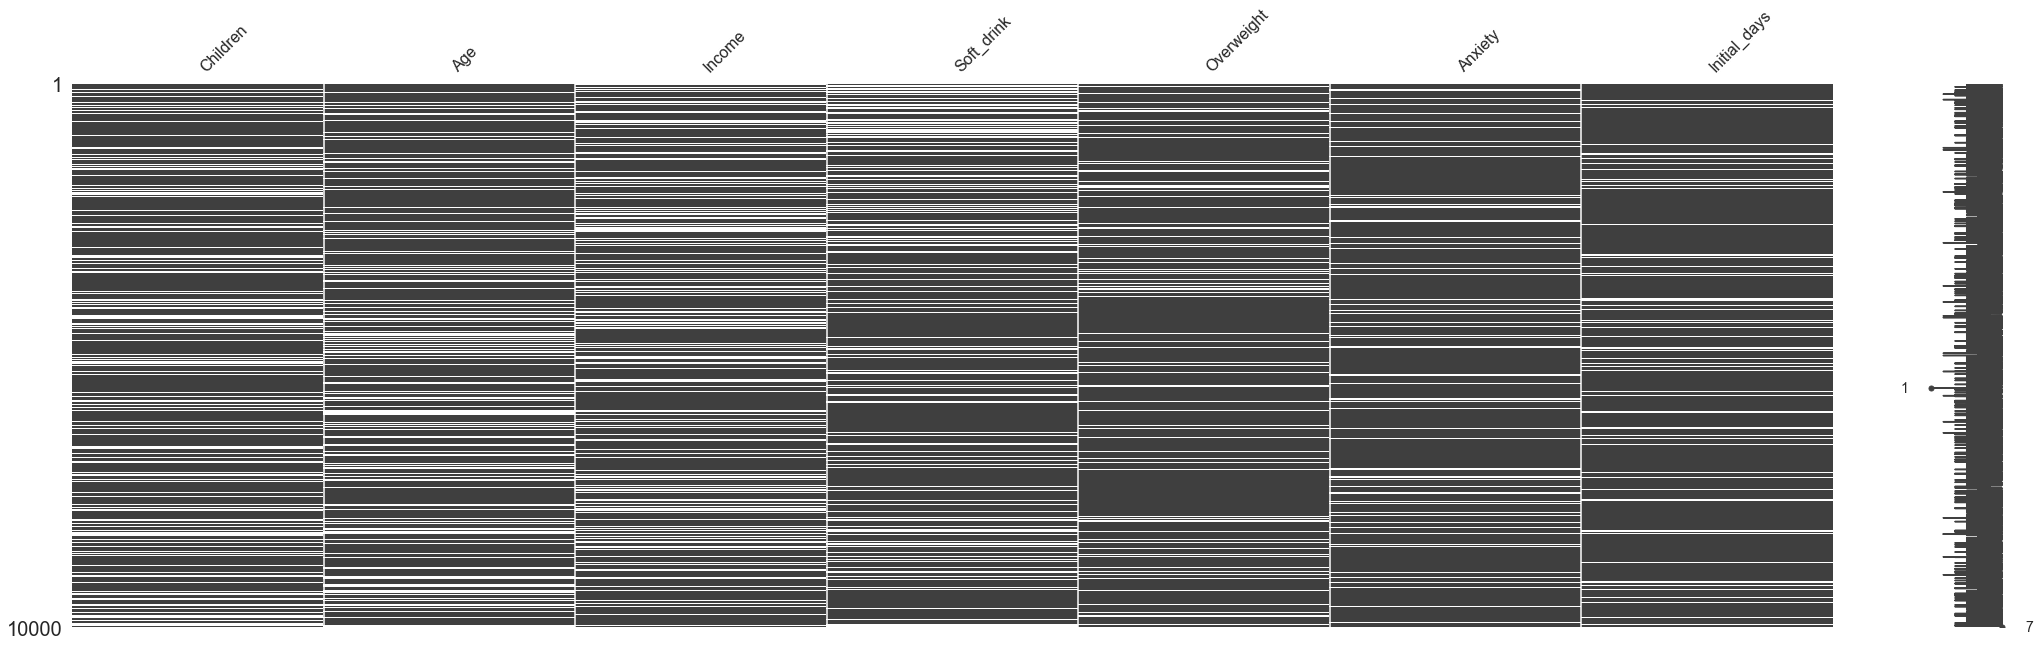

In [20]:
# visualize the dataframe's nullity
_ = msno.matrix(missing_df, figsize=(35, 10)) 

#### Missing Bar Chart

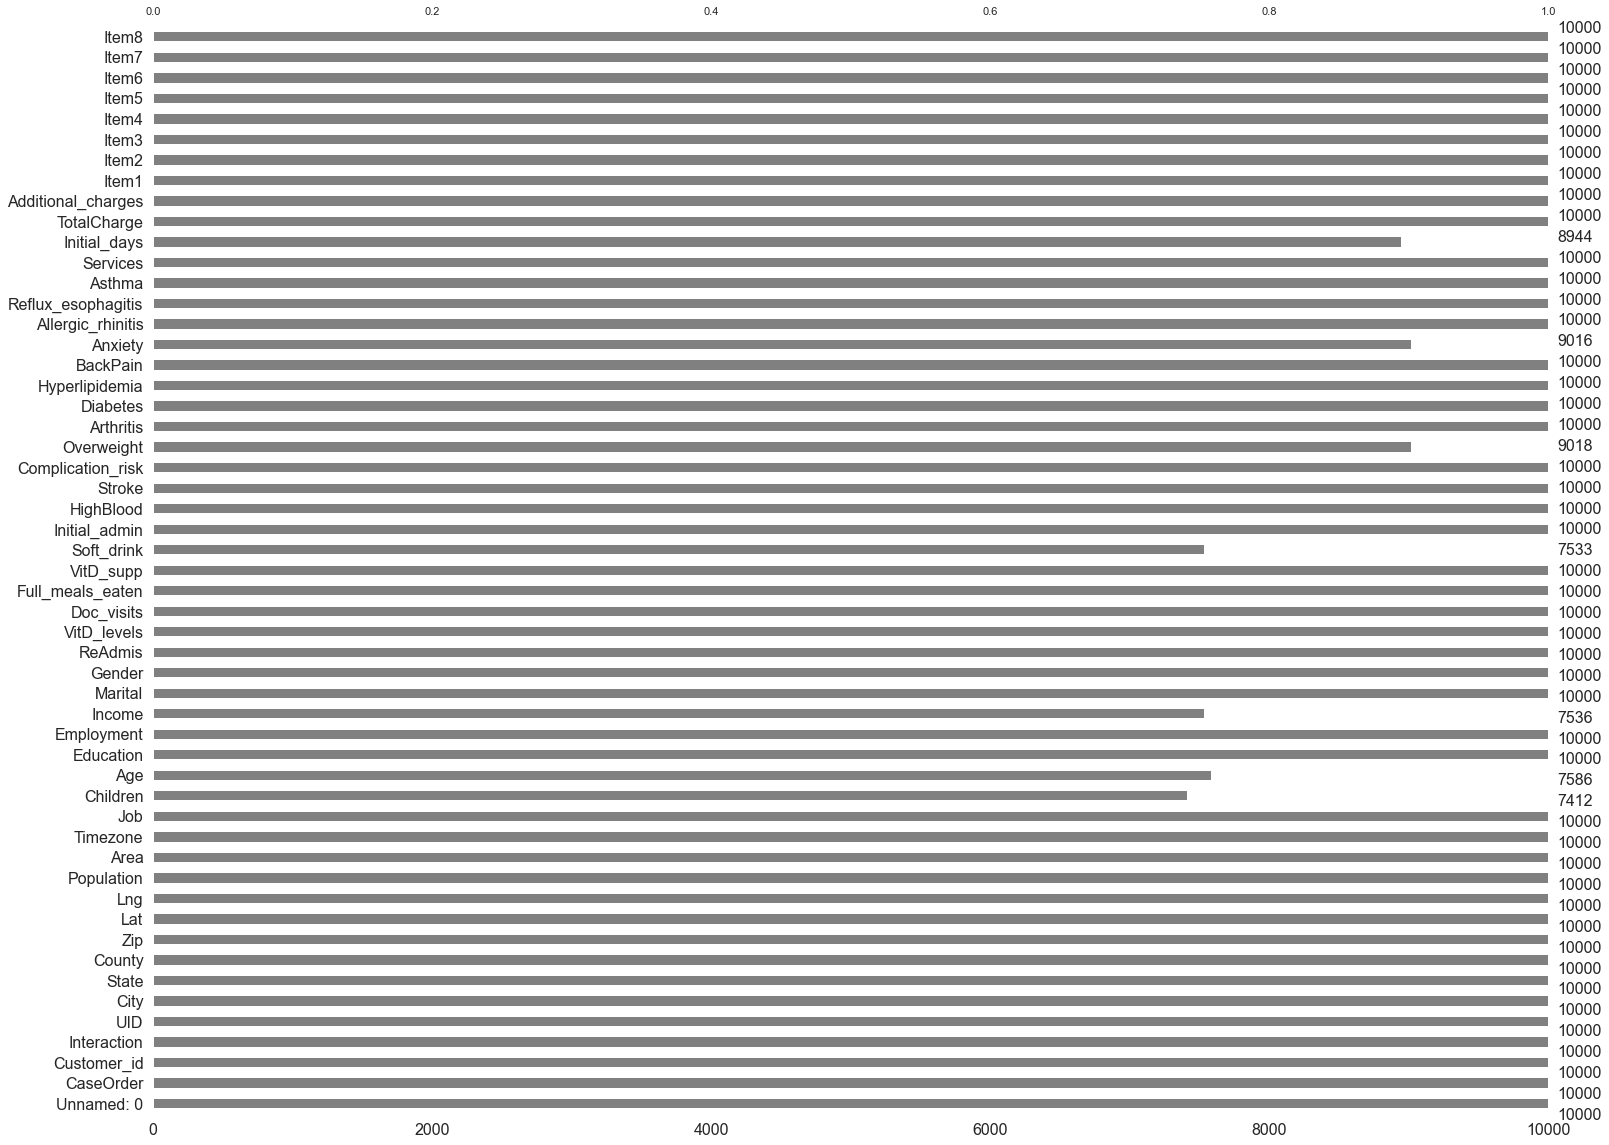

In [21]:
# bar chart visualization of the dataframe's nullity
_ = msno.bar(df, figsize=(25,20), color="gray")

#### Missing Heatmap

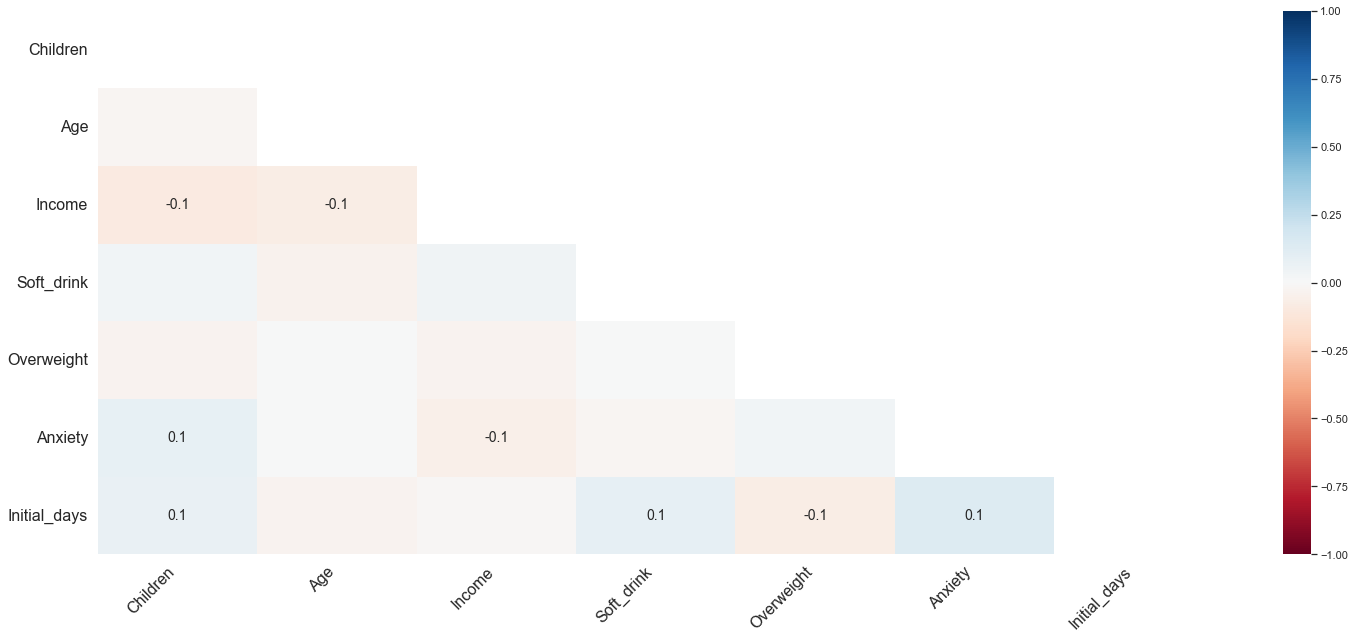

In [22]:
# heatmap visualization of nullity correlation within the DataFrame (displaying 250 records).
# -1 indicates if one variable appears then the other variable is very likely to be missing.
# 0 indicates there is no dependence between the occurrence of missing values of two variables.
# 1 indicates that when one variable appears then the other variable is likely to be present.
_ = msno.heatmap(missing_df.loc[:250], figsize=(25,10))

#### Missing Dendrogram

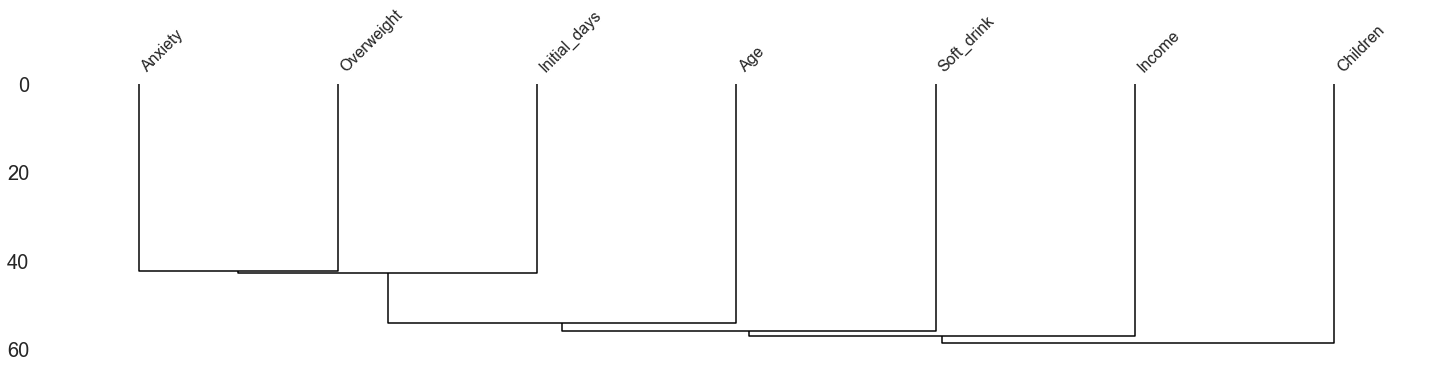

In [23]:
# shows the hierarchical relationship between objects
_ = msno.dendrogram(missing_df, orientation='bottom', figsize=(25,5))

### Detect Outliers

#### Z-Scores
find columns with addressable outliers

In [37]:
def get_zscore_cols(df):
    numeric_df = df.select_dtypes(include=['int64', 'float64']).apply(pd.to_numeric)
    z_score_df = np.abs(stats.zscore(numeric_df, nan_policy='omit')) > 3
    
    col_outlier_counts = z_score_df.sum()
    # create a dataframe using columns with at least 1 outlier     
    outlier_counts_df = col_outlier_counts[col_outlier_counts > 0]

    # outlier column names     
    return outlier_counts_df.index

# numerical columns with notable outliers that we're choosing to ignore
ignored_outlier_cols = ['Lat', 'Lng', 'Population', 'Age', 'Income', 'TotalCharge', 'Additional_charges', 'Doc_visits']

# store the relevant zscore columns that are important to address
z_score_cols = list(set(get_zscore_cols(df)) - set(ignored_outlier_cols))
# columns 
z_score_cols

['Item2',
 'Item8',
 'Item4',
 'Item3',
 'Item6',
 'Item1',
 'Children',
 'Item7',
 'VitD_supp',
 'Full_meals_eaten',
 'VitD_levels',
 'Item5']

#### store z-score values for addressable columns

In [63]:
zscore_df = df[z_score_cols].copy()

for col in z_score_cols:
    zscore_df[f"{col}_zscore"] = stats.zscore(df[col], nan_policy='omit')
    # store values where their absolute values exceeds a z-score of > 3
    zscore_df.loc[abs(zscore_df[f"{col}_zscore"]) > 3, [col, f"{col}_zscore"]]
    
# display zscore values    
zscore_df.iloc[:, zscore_df.columns.str.contains("zscore")]

Item2_zscore  Item8_zscore  Item4_zscore  Item3_zscore  Item6_zscore  \
0           -0.490         0.470        -1.462        -1.463        -0.506   
1            0.477        -0.489         0.468        -0.495         0.463   
2            0.477        -0.489         0.468         0.473         0.463   
3            1.443         1.430        -0.497         1.442         1.431   
4           -2.422        -0.489        -0.497        -0.495        -0.506   
...            ...           ...           ...           ...           ...   
9995        -1.456        -1.448        -0.497        -1.463        -0.506   
9996        -0.490         0.470        -1.462         0.473        -0.506   
9997        -0.490        -1.448         0.468        -0.495        -1.475   
9998         1.443        -0.489         0.468        -0.495        -0.506   
9999        -0.490        -0.489        -1.462        -0.495         2.400   

      Item1_zscore  Children_zscore  Item7_zscore  VitD_supp_zscore  \
0           -0.503           -0.510        -0.484            -0.635   
1           -0.503            0.418        -0.484             0.956   
2           -1.472            0.418        -0.484            -0.635   
3           -0.503           -0.974         1.475            -0.635   
4           -1.472              NaN         0.495             2.548   
...            ...              ...           ...               ...   
9995        -0.503              NaN         0.495             0.956   
9996        -0.503            0.882         0.495            -0.635   
9997        -0.503            0.418        -0.484            -0.635   
9998         1.435            0.418         0.495             0.956   
9999         0.466            2.738         0.495             0.956   

      Full_meals_eaten_zscore  VitD_levels_zscore  Item5_zscore  
0                      -0.993              -0.240         0.488  
1                       0.991              -0.062         0.488  
2                      -0.001              -0.297        -0.482  
3                      -0.001              -0.296         0.488  
4                      -0.993              -0.378         1.459  
...                       ...                 ...           ...  
9995                    0.991              -0.436         0.488  
9996                   -0.993              -0.143         1.459  
9997                    0.991              -0.544         0.488  
9998                    0.991               0.378         0.488  
9999                   -0.993               0.150        -0.482  

[10000 rows x 12 columns]

#### Boxplots

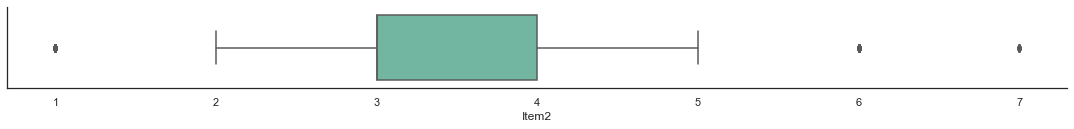

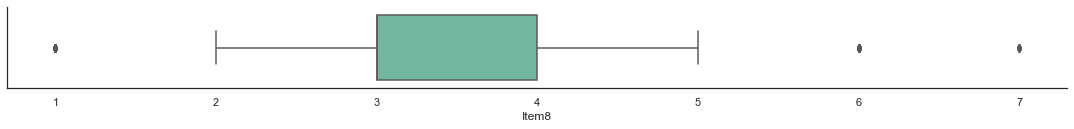

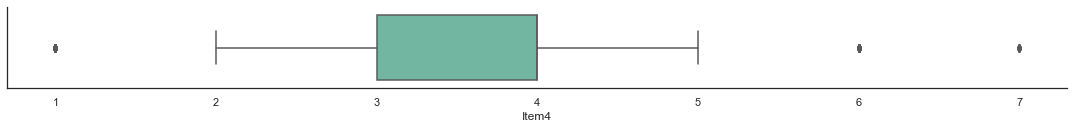

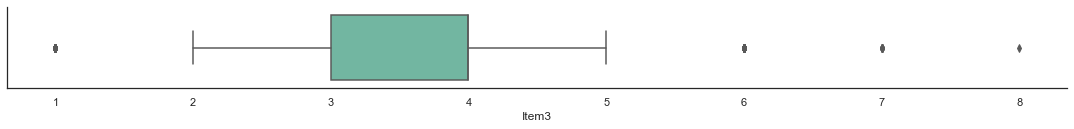

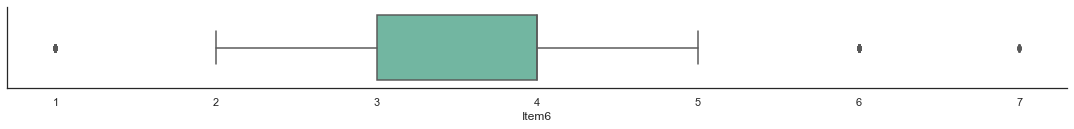

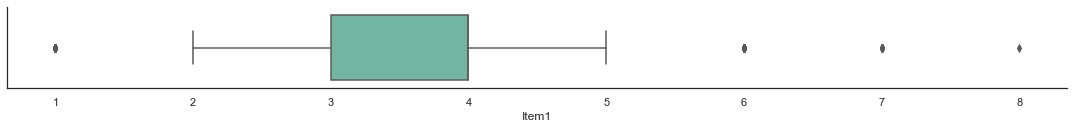

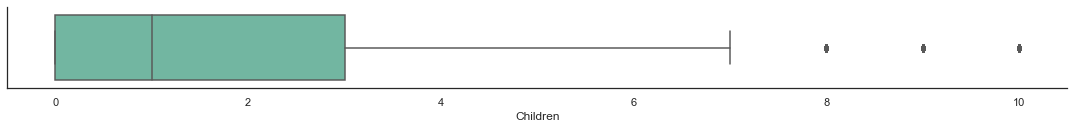

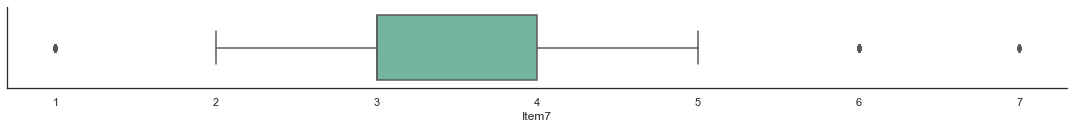

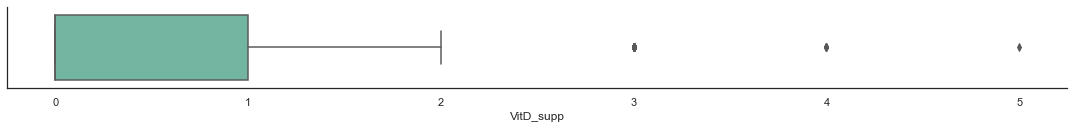

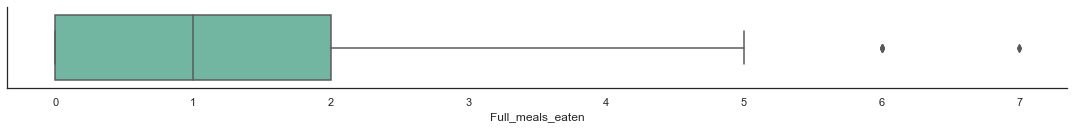

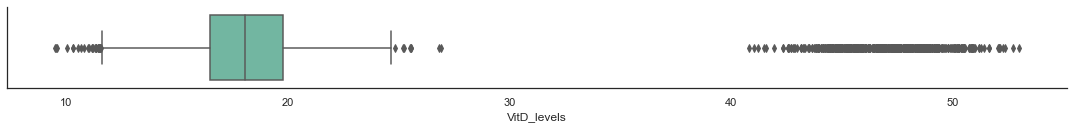

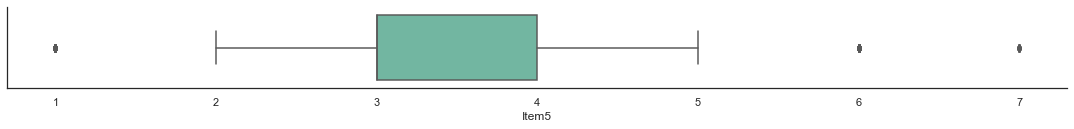

In [69]:
# create a histogram for numerical columns
def create_boxplots(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        fig = plt.figure(figsize =(19, 1.5))
        _ = sns.boxplot(x=col, data=df, labels=[col], orient="h")
        plt.show()
        

# create_boxplots(df.loc[:, ~df.columns.isin(['Unnamed: 0', 'CaseOrder'])])        

# display boxplots with known and relevant outliers
create_boxplots(df[z_score_cols])

#### Histograms

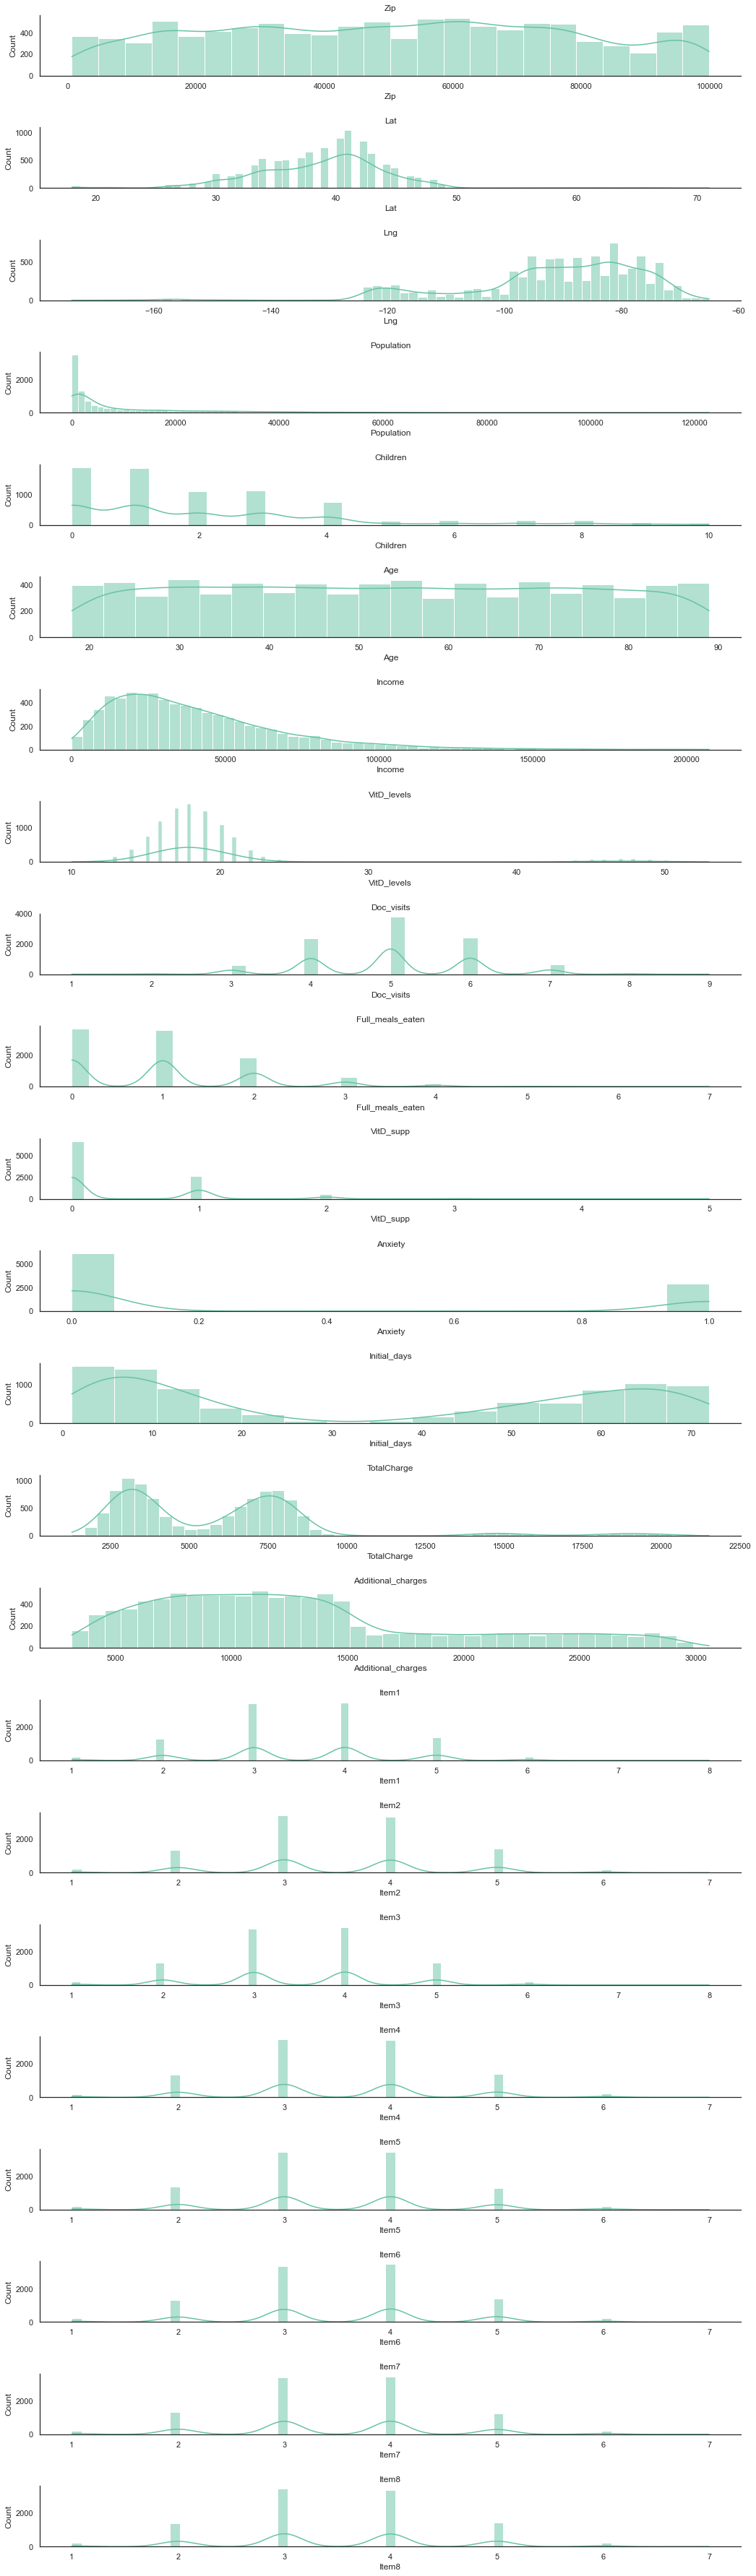

In [138]:
def create_histograms(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(15, 50))

    # create a histogram for numerical columns
    rounded_df = df.round()
    for ax, col in zip(axes, numeric_cols):
        ax.set_title(col)
        _ = sns.histplot(data=rounded_df, x=col, ax=ax, kde=True)
        
    fig.tight_layout(pad=2.0)
    plt.show()
    
    
create_histograms(df.loc[:, ~df.columns.isin(['Unnamed: 0', 'CaseOrder'])])

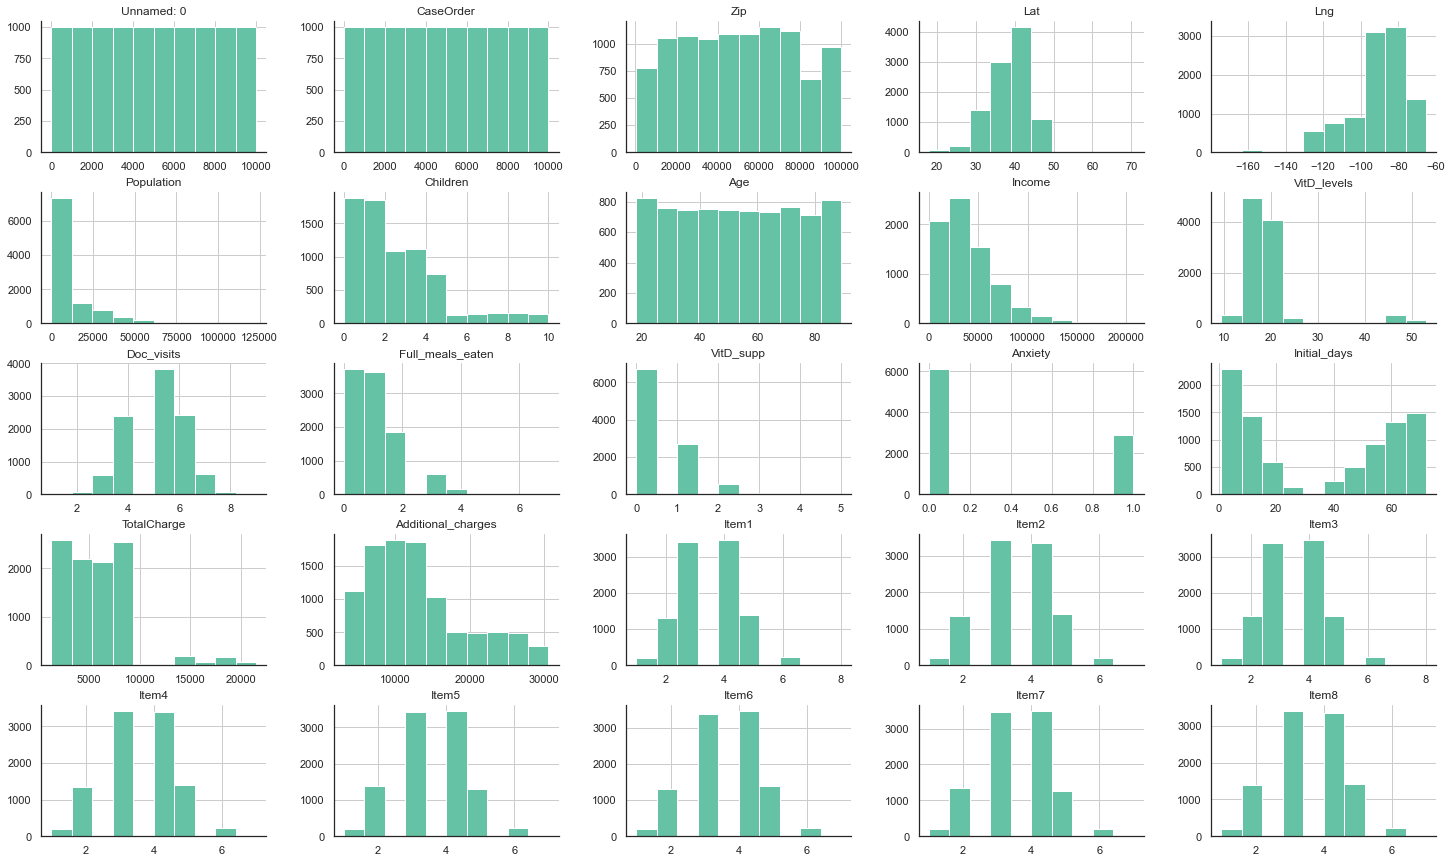

In [137]:
_ = df.hist(layout=(5,5), figsize = (25,15))

### Re-Expression Categories
convert categorical string values to category data type

In [92]:
# convert "Soft_drink" nan's to 'No'
df.loc[df["Soft_drink"].isna(), "Soft_drink"] = "No"

# convert "Overweight" float64's to Yes/No bools
df["Overweight"] = df["Overweight"].map({np.nan: "No", 0: "No", 1: "Yes"})

# validate a soft drink value exists for each record
assert len(df["Soft_drink"].isna().index) == len(df.index)

# categorical columns and potential categorical columns
ctg_cols = [
    "Allergic_rhinitis",
    "Area",
    "Arthritis",
    "Asthma",
    "BackPain",
    "Complication_risk",
    "Diabetes",
    "Education",
    "Employment",
    "Gender",
    "HighBlood",
    "Hyperlipidemia",
    "Initial_admin",
    "Marital",
    "Overweight",
    "ReAdmis",
    "Reflux_esophagitis",
    "Services",
    "Soft_drink",
    "Stroke",
    "Timezone",
]

for col in ctg_cols:
    # print(df[col].unique())
    print(f"--- CONVERTING COLUMN: '{col}' to category ---")

    # convert column to a category
    df = df.astype({col: "category"})

    # confirm the values successfully converted
    assert df[col].dtype == "category"

    # report categorical counts
    print(df[col].value_counts(), end="\n\n")

--- CONVERTING COLUMN: 'Allergic_rhinitis' to category ---
No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64

--- CONVERTING COLUMN: 'Area' to category ---
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64

--- CONVERTING COLUMN: 'Arthritis' to category ---
No     6426
Yes    3574
Name: Arthritis, dtype: int64

--- CONVERTING COLUMN: 'Asthma' to category ---
No     7107
Yes    2893
Name: Asthma, dtype: int64

--- CONVERTING COLUMN: 'BackPain' to category ---
No     5886
Yes    4114
Name: BackPain, dtype: int64

--- CONVERTING COLUMN: 'Complication_risk' to category ---
Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

--- CONVERTING COLUMN: 'Diabetes' to category ---
No     7262
Yes    2738
Name: Diabetes, dtype: int64

--- CONVERTING COLUMN: 'Education' to category ---
Regular High School Diploma                 2444
Bachelor's Degree                           1724
Some College, 1 or More Years, No Degree    1484


### Cleaning text data



In [93]:
str_cols = df.select_dtypes('object')
df[str_cols.columns] = str_cols.apply(lambda s: s.str.strip())

# validate all state abbreviations are 2 characters 
assert (df['State'].str.len() == 2).all()

# validate zip codes are 3, 4 or 5 digits
assert df['Zip'].astype('str').str.len().between(3,5).all()

# cross field validation: validate 3 digit zip codes are Puerto Rican addresses
assert (df.loc[df['Zip'].astype('str').str.len() == 3, ['State', 'Zip']]["State"] == 'PR').all()

### Other Data Cleaning

In [94]:
# Verify these columns are the same, if so drop the "Unnamed: 0" column
# drop "Unnamed: 0" if dupes
assert df["Unnamed: 0"].ne(df["CaseOrder"]).all()

AssertionError: 

In [95]:
# cast to int if this fails
assert df['Age'].dtype == 'int'

AssertionError: 

In [96]:
# cast to int if this fails
assert df['Children'].dtype == 'int'

AssertionError: 

## C2: Justification of Approach
Explain the plan for cleaning the data by doing the following:

2.  Justify your approach for assessing the quality of the data, include:

•  characteristics of the data being assessed,

•  the approach used to assess the quality.

## C3: Justification of Tools
Explain the plan for cleaning the data by doing the following:

3.  Justify your selected programming language and any libraries and packages that will support the data-cleaning process.
    - Python
    - Jupyter Notebooks
    - numpy as np
    - numpy
    - pandas
    - matplotlib.pyplot
    - seaborn
    - missingno
    - sklearn
      - accuracy_score, LassoCV, PCA, RandomForestRegressor, RFE, StandardScaler, SVC, train_test_split, VarianceThreshold
    - fuzzywuzzy
        - process
    - fancyimpute
        - KNN, IterativeImputer
    - statsmodels.api 
      

## C4: Provide the Code
Explain the plan for cleaning the data by doing the following:

4.  Provide the code you will use to identify the anomalies in the data.

/var/folders/dl/vq577pv129dffsrtm__9bd380000gn/T/ipykernel_18609/4179717664.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'CaseOrder'}>,
        <AxesSubplot:title={'center':'Zip'}>,
        <AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Lng'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'VitD_levels'}>],
       [<AxesSubplot:title={'center':'Doc_visits'}>,
        <AxesSubplot:title={'center':'Full_meals_eaten'}>,
        <AxesSubplot:title={'center':'VitD_supp'}>,
        <AxesSubplot:title={'center':'Anxiety'}>,
        <AxesSubplot:title={'center':'Initial_days'}>],
       [<AxesSubplot:title={'center':'TotalCharge'}>,
        <AxesSubplot:title={'center':'Additional_charges'}>,
        <AxesSubplot:title={'center':'Item1'}>,
        <AxesSubplot:title={'center':'Item2'}>,
        <AxesSubplot:

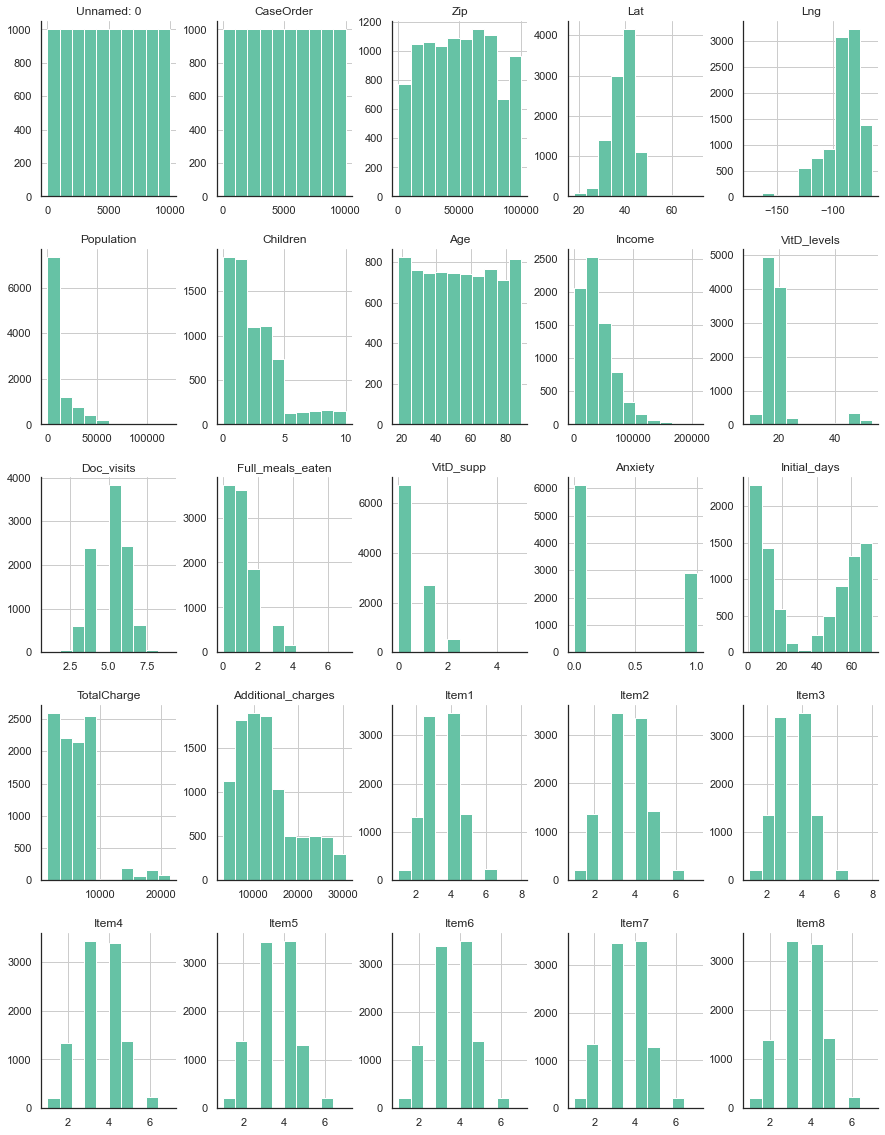

Signature: fig.gca(**kwargs)
Docstring:
Get the current Axes, creating one if necessary.

The following kwargs are supported for ensuring the returned Axes
adheres to the given projection etc., and for Axes creation if
the active Axes does not exist:

Properties:
    adjustable: {'box', 'datalim'}
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: scalar or None
    anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
    animated: bool
    aspect: {'auto', 'equal'} or float
    autoscale_on: bool
    autoscalex_on: bool
    autoscaley_on: bool
    axes_locator: Callable[[Axes, Renderer], Bbox]
    axisbelow: bool or 'line'
    box_aspect: float or None
    clip_box: `.Bbox`
    clip_on: bool
    clip_path: Patch or (Path, Transform) or None
    contains: unknown
    facecolor or fc: color
    figure: `.Figure`
    frame_on: bool
    gid: str
    in_layout: bool
    label: object
    navigate: bool
    na

In [99]:
# df.hist(figsize=(75, 75))
# plt.tight_layout()
# plt.show()

# find cols with null values

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
fig.gca?
df.hist(ax = ax)

In [ ]:
# DataFrame.plot.bar(x=None, y=None, **kwargs)
# df.plot.bar(index=1)
# df
# df.plot.bar(rot=0)
# df.hist(ax = ax)

In [ ]:
df['Customer_id'].str.len().unique()
# df[df['Customer_id'].str.len() == 6]
df['State'].str.len().unique()
df['UID'].str.len().unique()
df['Interaction'].str.len().unique()
df['Zip'].astype(str).str.len().unique()
df[df['Zip'].astype(str).str.len() == 3]

df['Lat'].astype(str).str.len().unique()
df['Lng'].astype(str).str.len().unique()
df[df['Lng'].astype(str).str.len() == 10]

In [ ]:
# Verify these columns are the same, if so drop the "Unnamed: 0" column
df[df["Unnamed: 0"] != df["CaseOrder"]]
# df.drop("Unnamed: 0", 1)

In [ ]:
df[["Unnamed: 0", "CaseOrder"]].describe()

In [ ]:
pd.DataFrame.hist(df[["Unnamed: 0", "CaseOrder"]])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
# convert categorical string values to category data type
# df["Employment"] = df["Employment"].astype("category")

df["Soft_drink"].unique() # > [nan, 'No', 'Yes']
# convert "Soft_drink" nan's to 'No'
df.loc[df["Soft_drink"].isna(), "Soft_drink"] = "No"
# validate a value exists for each row
assert len(df["Soft_drink"].isna().index) == len(df.index)

# df[df["Soft_drink"] == np.nan]

for col in ["Employment", "Marital", "Gender", "ReAdmis", "Soft_drink", "Initial_admin", "HighBlood", "Stroke", "Complication_risk", "Arthritis", "Diabetes", "Hyperlipidemia","BackPain", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma", "Services"]:
    print(f"Converting feature '{col}' to 'category' data type")
    # report categorical counts     
    print(df[col].value_counts(), end="\n\n")

    # convert column to a category
    df = df.astype({col: "category"})

    # confirm the values successfully converted     
    assert df[col].dtype == "category"

# df["Soft_drink"].unique()
# df.groupby("Soft_drink").size()

In [ ]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.boxplot(df[col], labels=[col], vert=False)
    plt.show()

# Part III: Data Cleaning
---

## D1: Cleaning Findings

In [310]:
df = pd.read_csv(filename)
treated_df = df.copy()

### Duplicate Treatment

In [236]:
treated_df = treated_df.drop_duplicates(subset=['Customer_id', 'Interaction', 'UID'])
assert treated_df.duplicated(subset=['Customer_id', 'Interaction', 'UID']).sum() == 0

### Missing Value Treatment

In [237]:
null_df = treated_df.isnull().sum()
null_counts_df = null_df[null_df > 0].sort_values(ascending=False)

# store the list of column names with missing values
missing_cols = null_counts_df.index

null_counts_df

Children        2588
Soft_drink      2467
Income          2464
Age             2414
Initial_days    1056
Anxiety          984
Overweight       982
dtype: int64

#### Children Imputation Comps

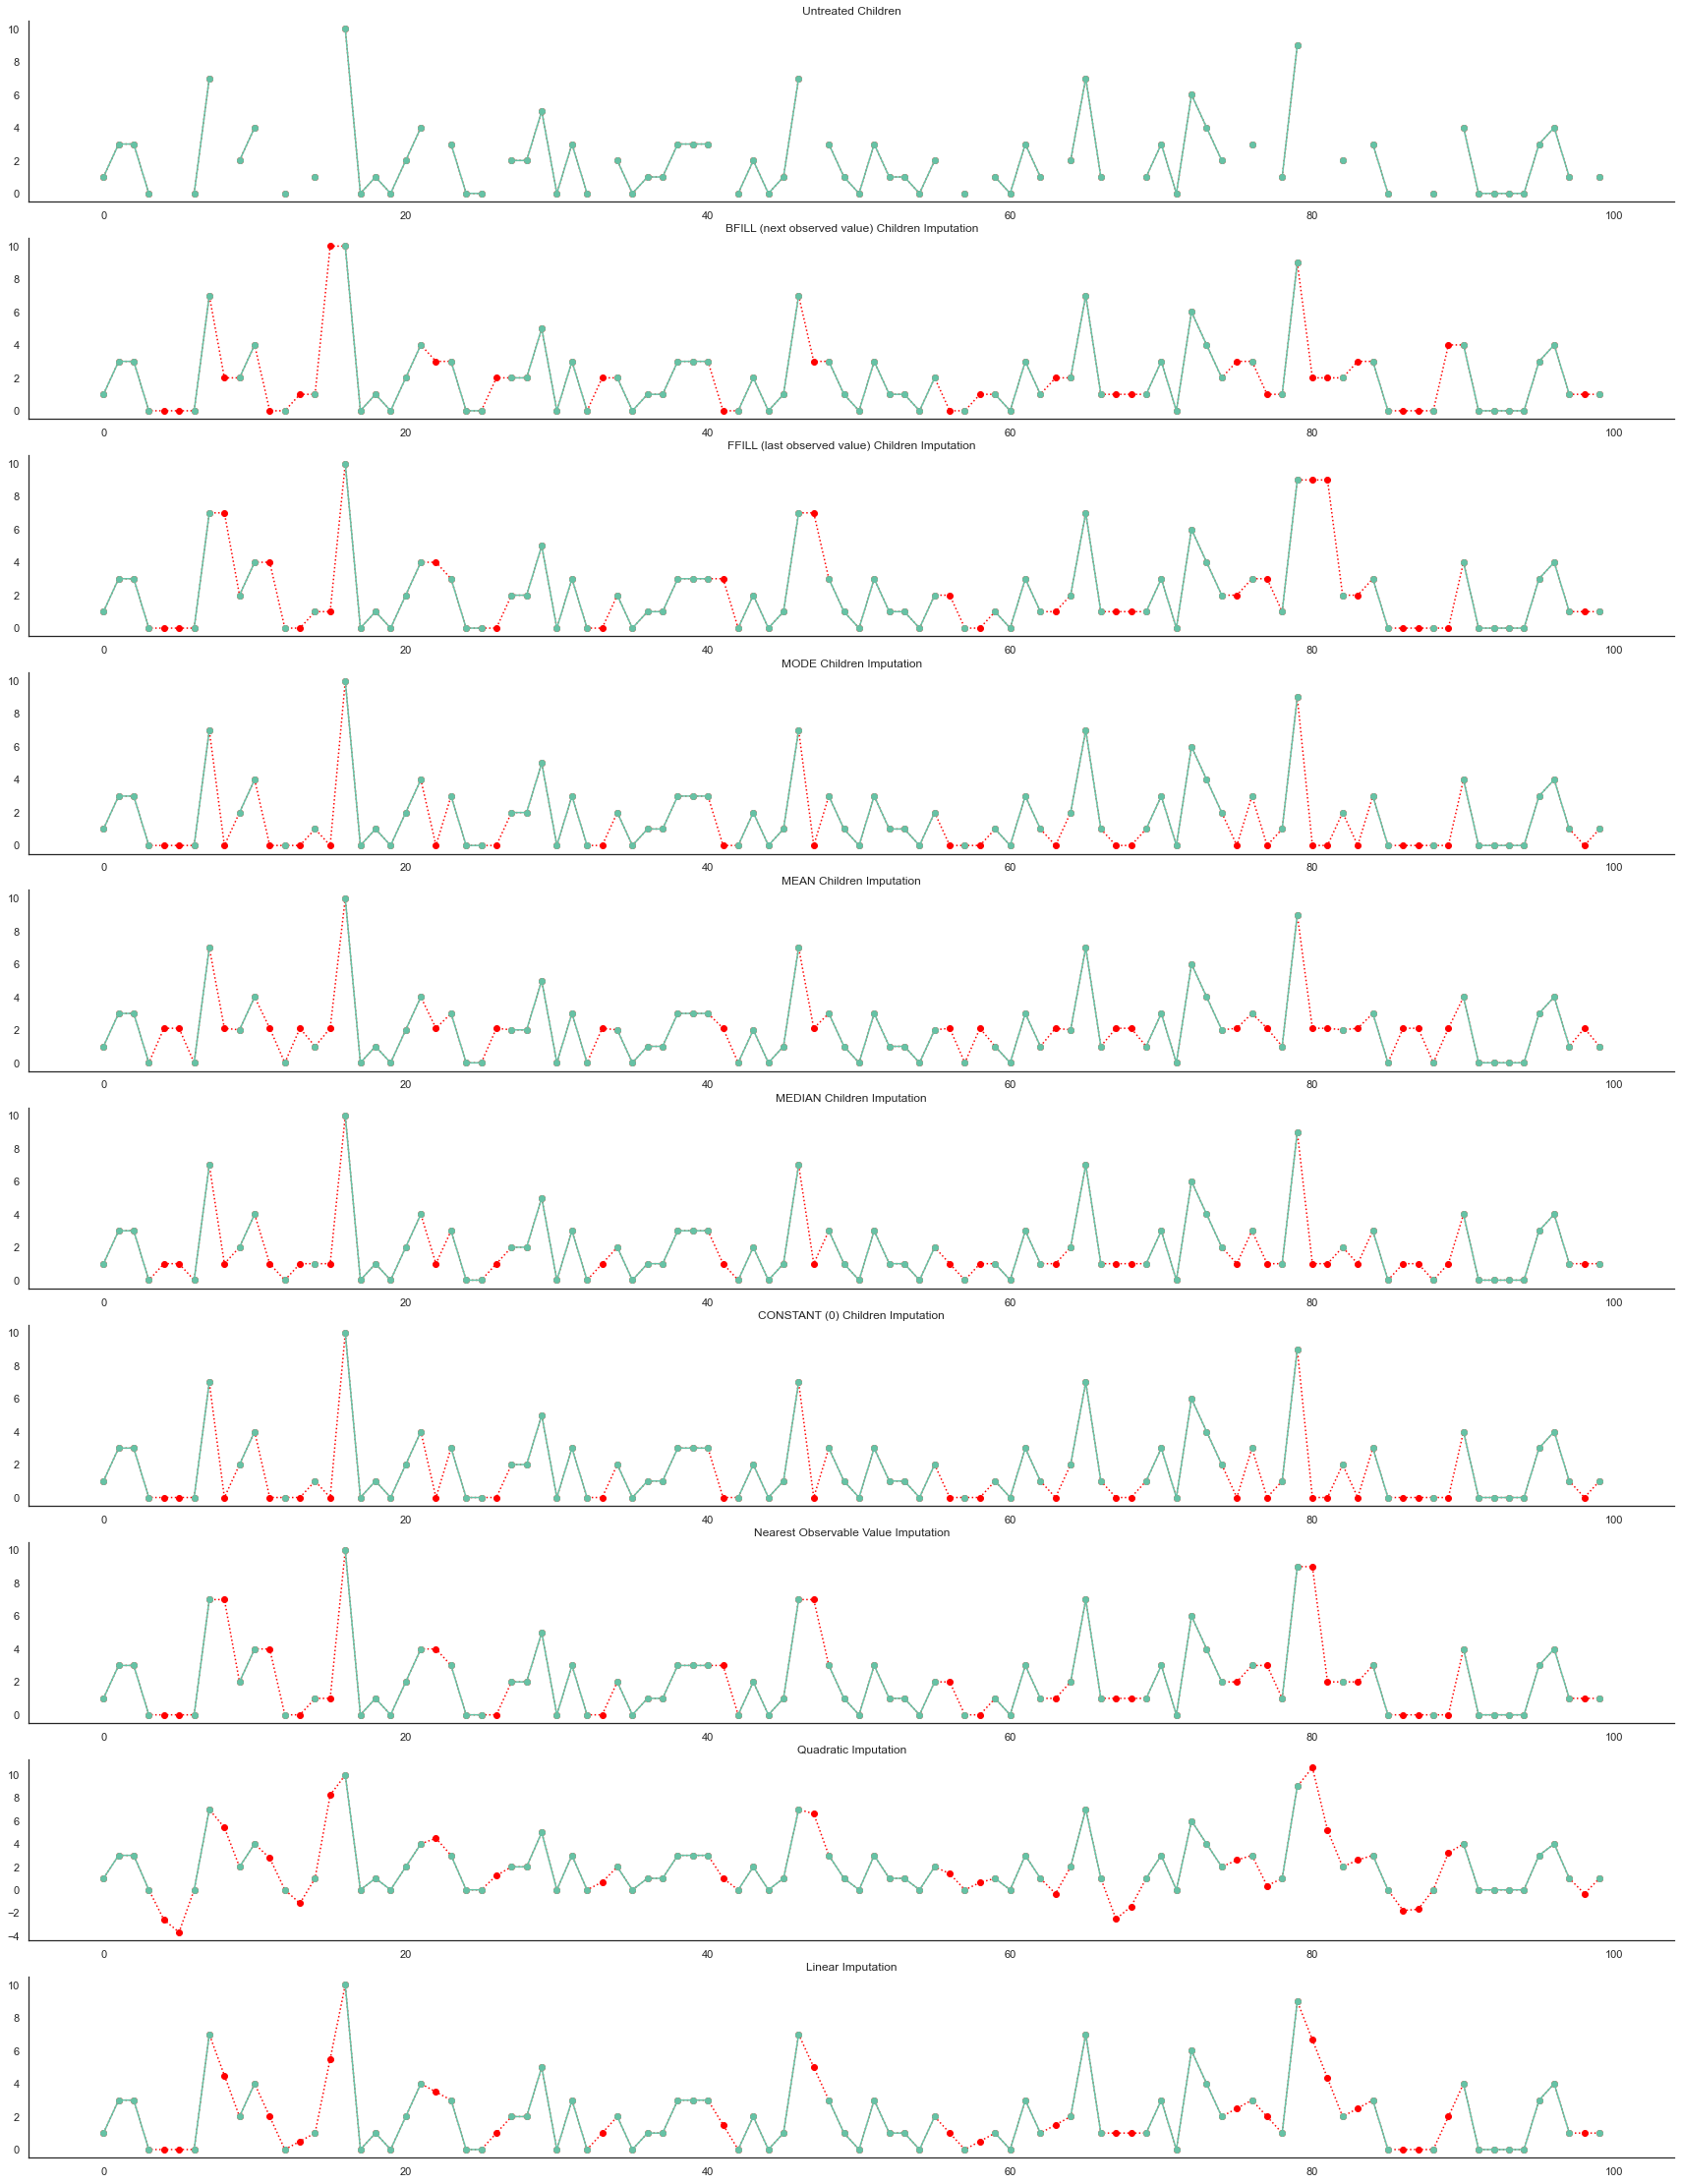

In [238]:
n = 100
col = 'Children'
imp_df = df[col].head(n)

imputations = {
    f'Untreated {col}': imp_df,
    f'BFILL (next observed value) {col} Imputation': imp_df.fillna(method='bfill'),
    f'FFILL (last observed value) {col} Imputation': imp_df.fillna(method='ffill'),    
    f'MODE {col} Imputation': imp_df.fillna(df[col].mode()[0]),
    f'MEAN {col} Imputation': imp_df.fillna(df[col].mean()),
    f'MEDIAN {col} Imputation': imp_df.fillna(df[col].median()),
    f'CONSTANT (0) {col} Imputation': imp_df.fillna(0),
    f'Nearest Observable Value Imputation': imp_df.interpolate(method='nearest'),
    f'Quadratic Imputation': imp_df.interpolate(method='quadratic'),
    f'Linear Imputation': imp_df.interpolate(method='linear'),    
}

fig, axes = plt.subplots(len(imputations), 1, figsize=(30, 40))

for ax, (k, v) in zip(axes, imputations.items()):
    _ = v.plot(title=k, color='red', marker='o', linestyle='dotted', ax=ax)
    _ = df[col].head(n).plot(marker='o', ax=ax)

#### Age Imputation Comps

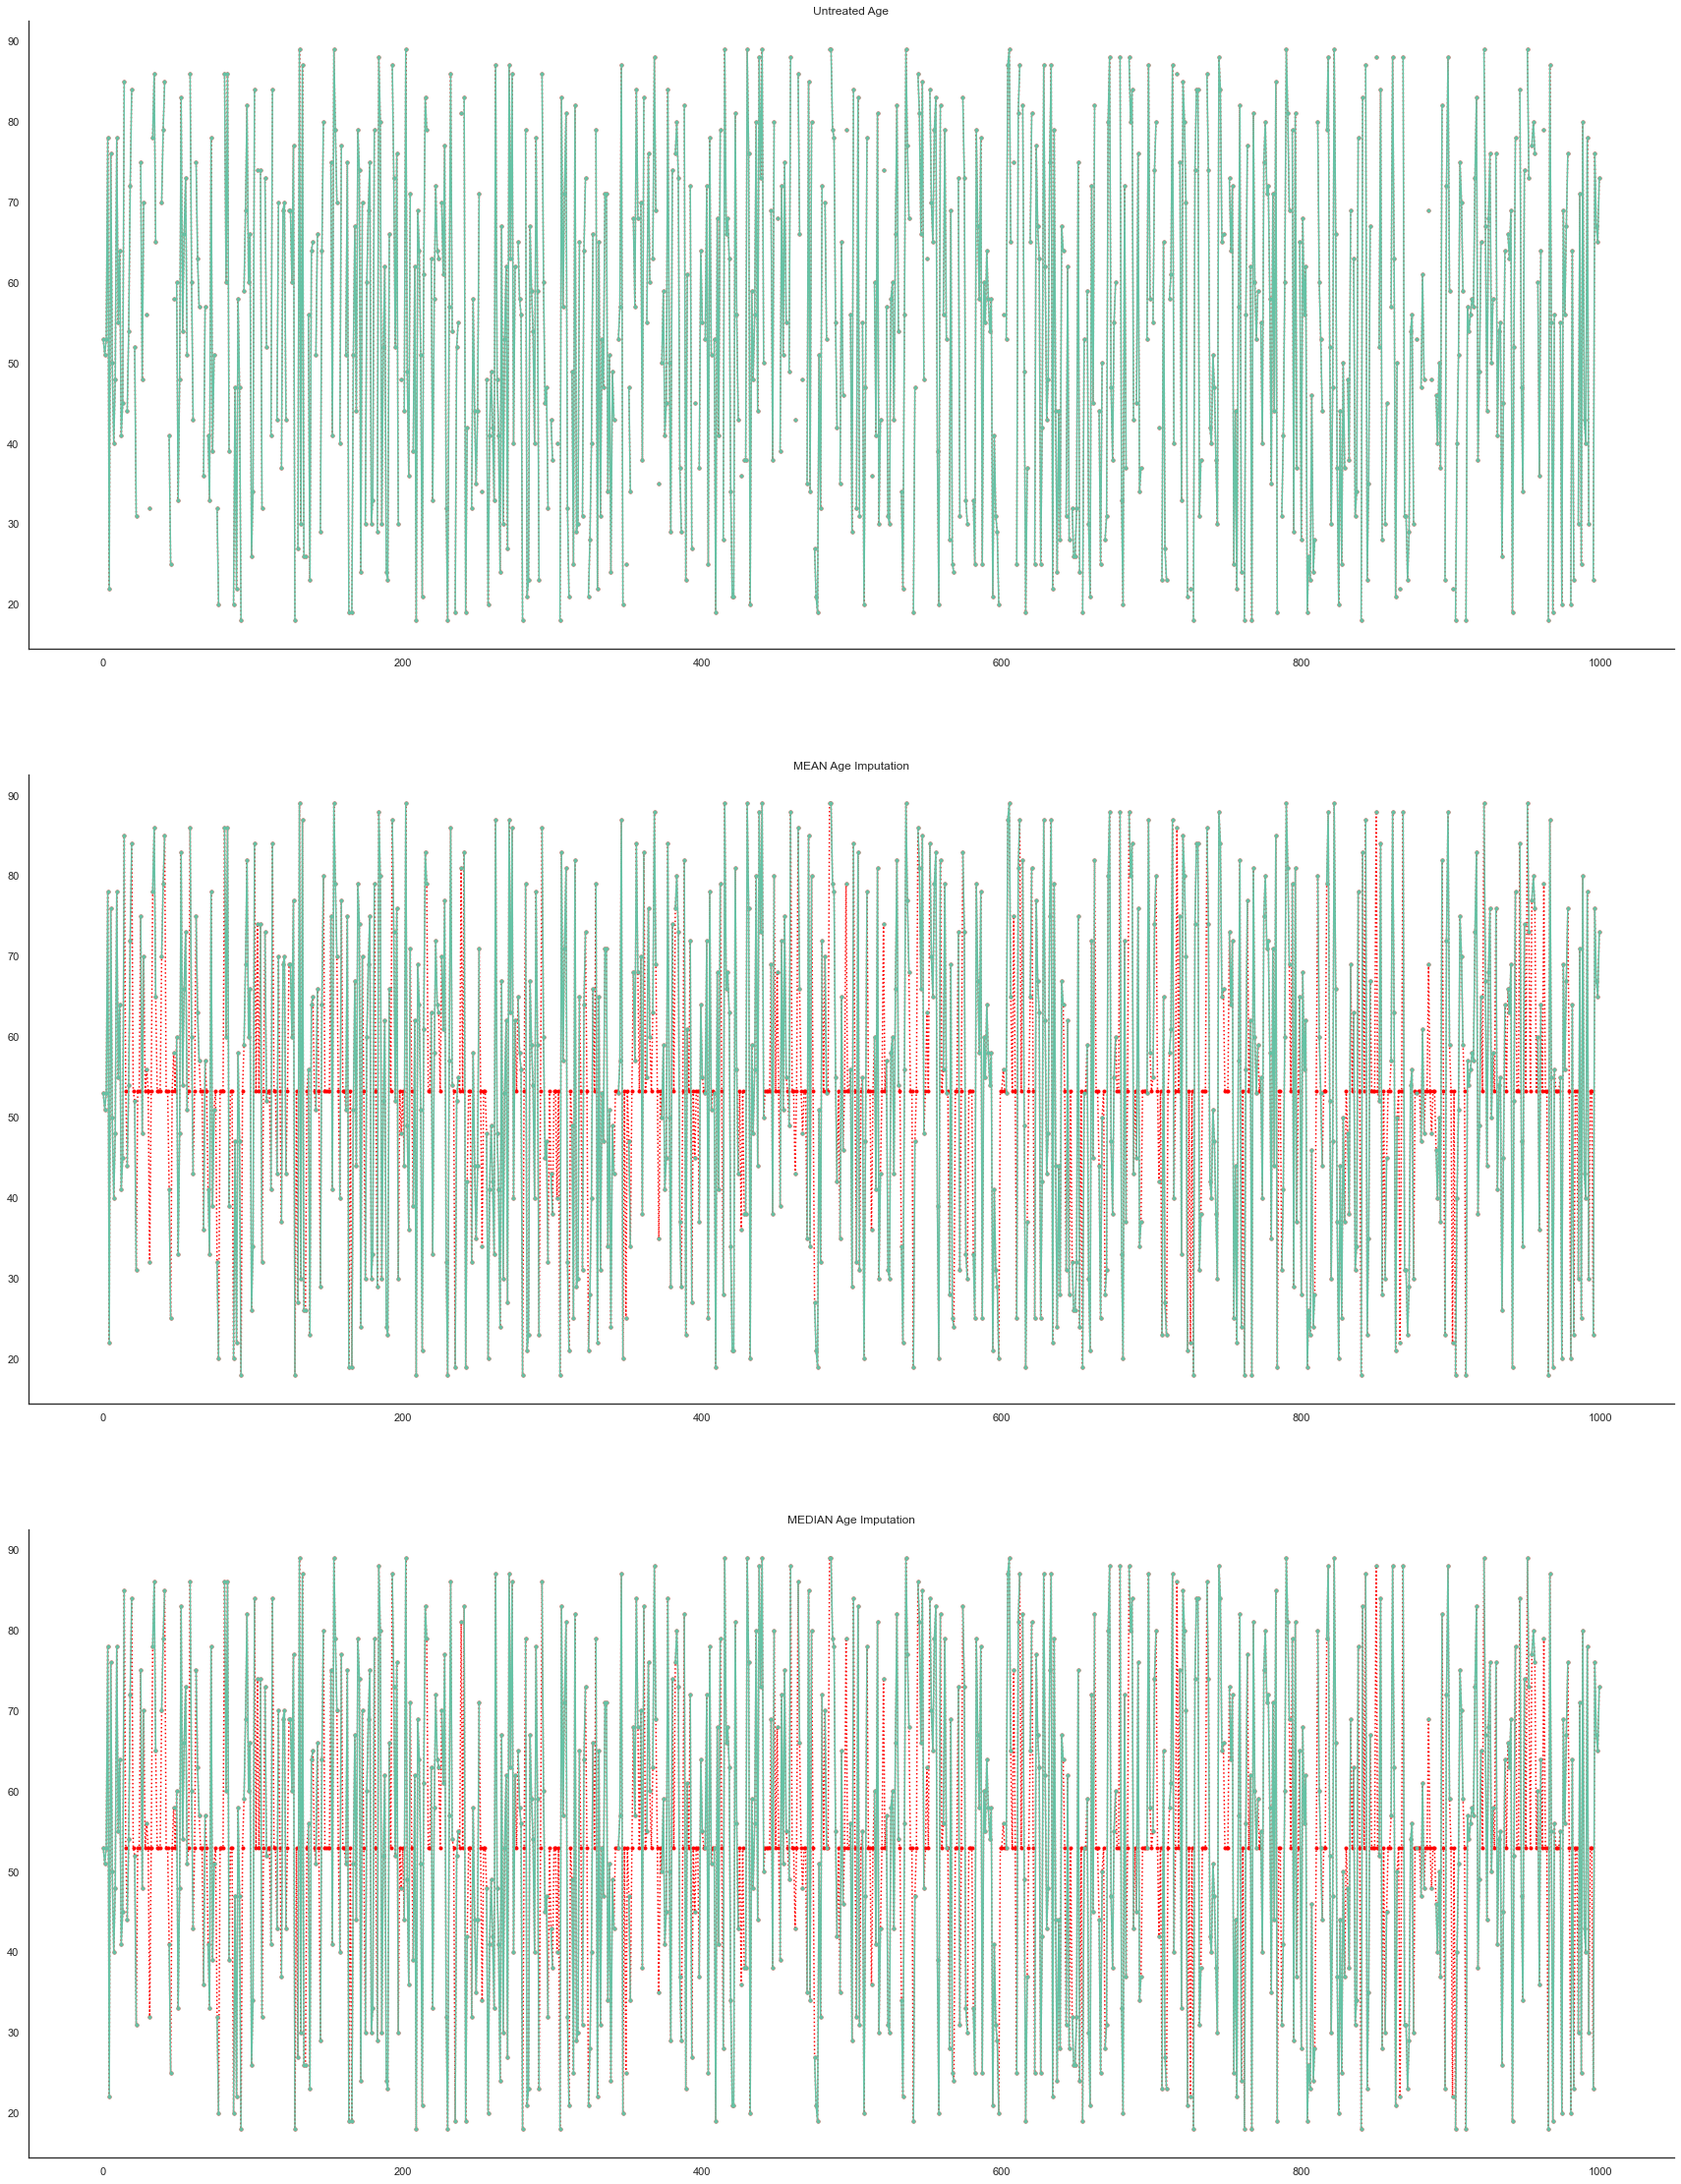

In [239]:
n = 1000
col = 'Age'
imp_df = df[col].head(n)

imputations = {  
    f'Untreated {col}': imp_df,
    f'MEAN {col} Imputation': imp_df.fillna(df[col].mean()),    
    f'MEDIAN {col} Imputation': imp_df.fillna(df[col].median()),
}

fig, axes = plt.subplots(len(imputations), 1, figsize=(30, 40))

for ax, (k, v) in zip(axes, imputations.items()):
    _ = v.plot(title=k, color='red', marker='.', linestyle='dotted', ax=ax)
    _ = df[col].head(n).plot(marker='.', ax=ax)

#### Initial_days Imputation Comps

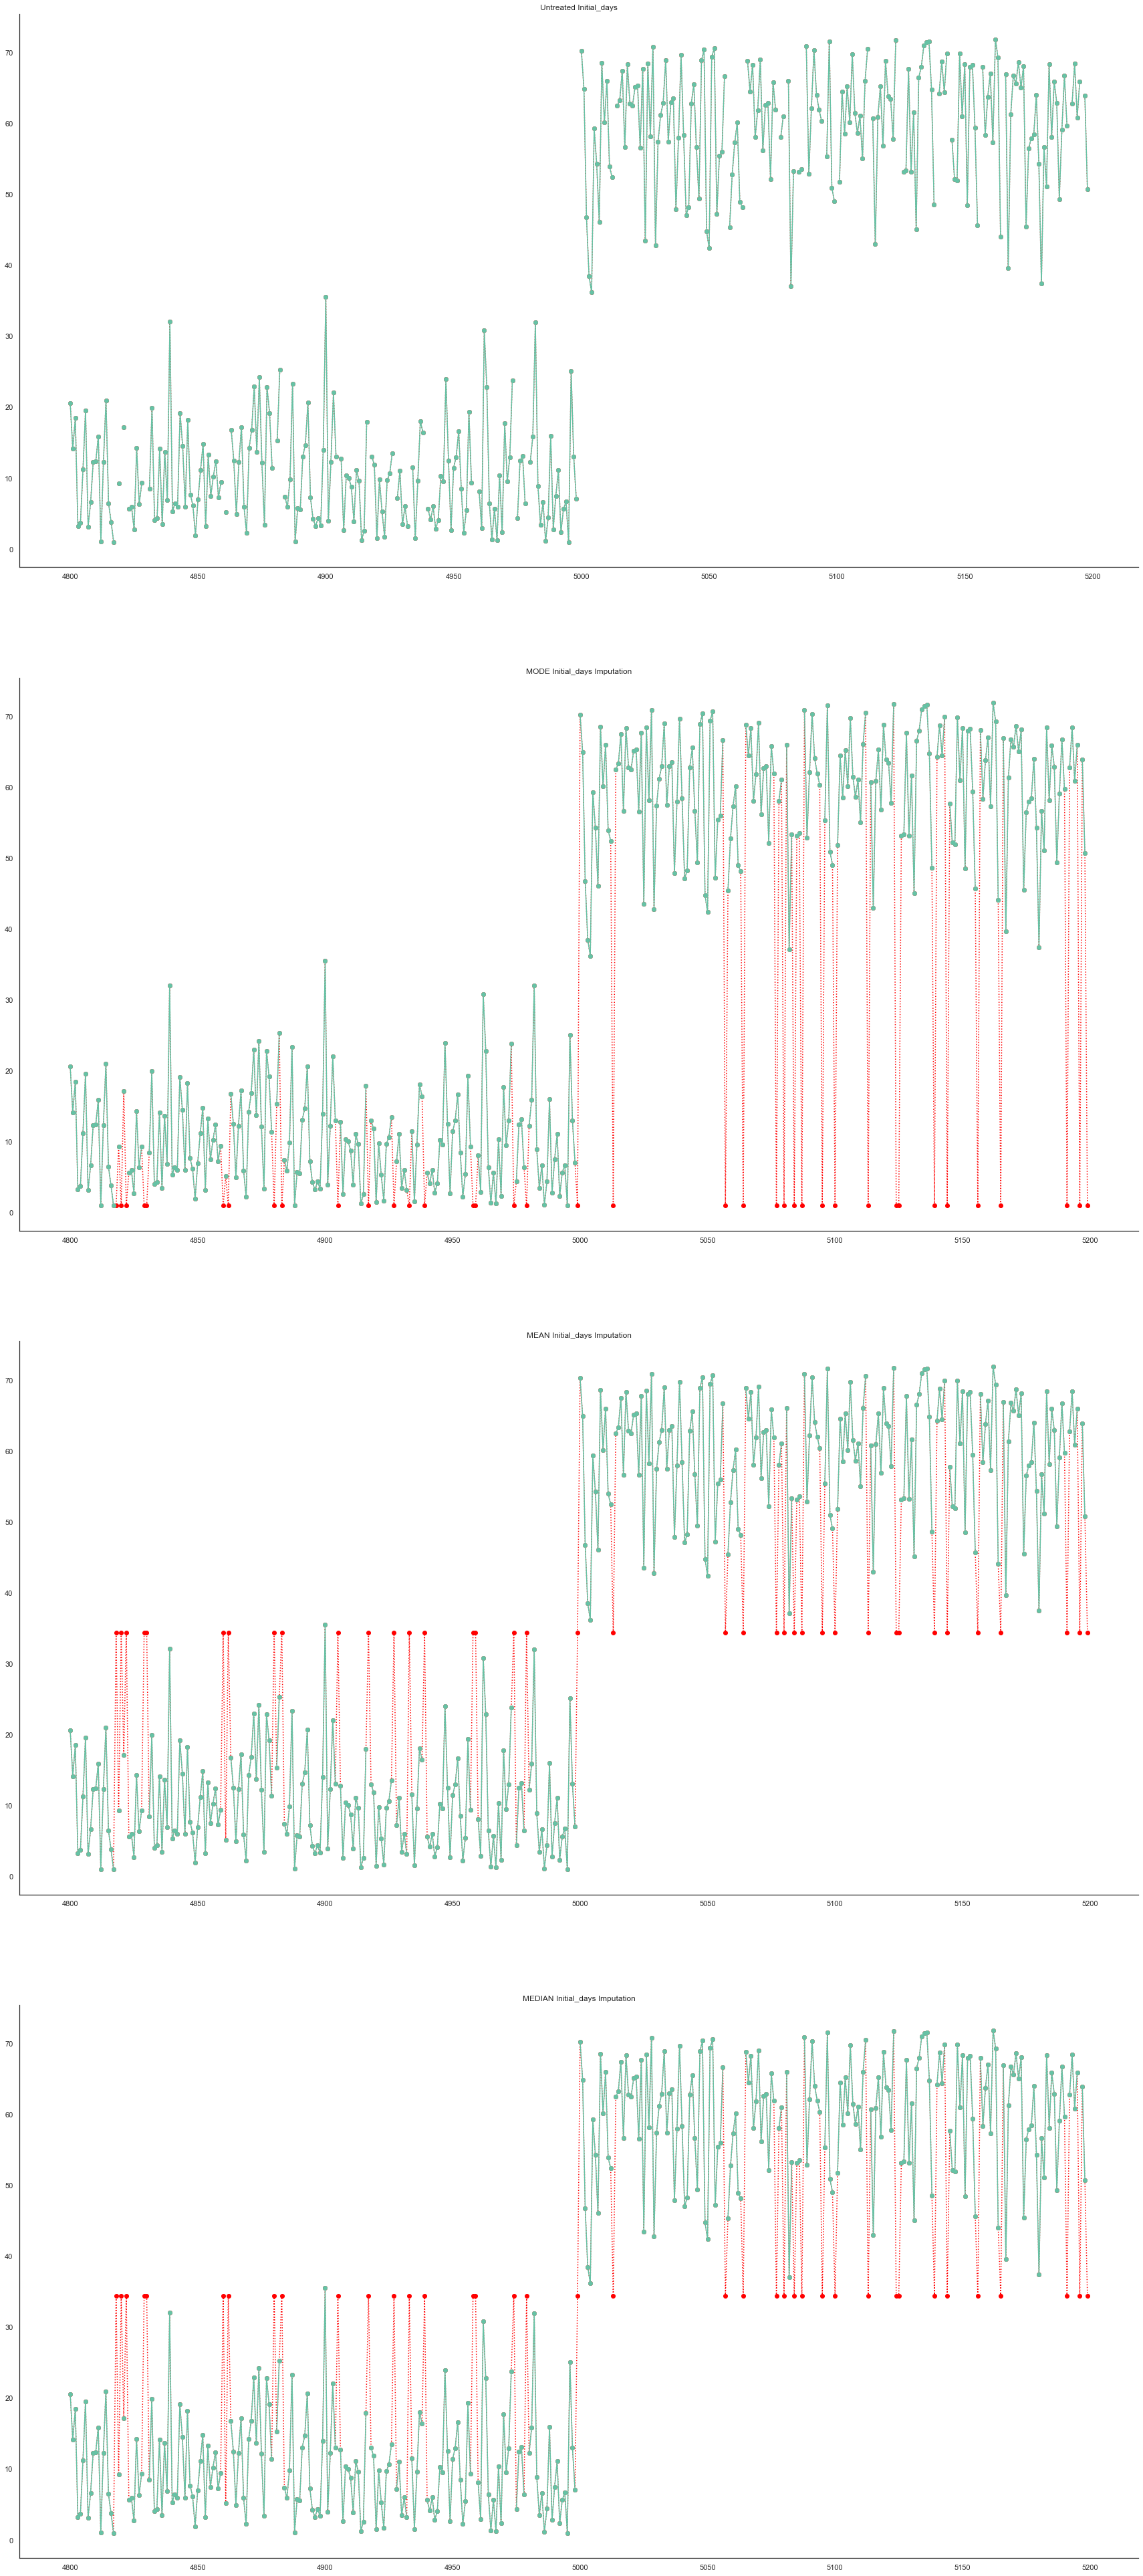

In [240]:
col = 'Initial_days'
rows = range(4800,5200)
imp_df = df[col].loc[rows]

imputations = {  
    f'Untreated {col}': imp_df,
    f'MODE {col} Imputation': imp_df.fillna(df[col].mode()[0]),
    f'MEAN {col} Imputation': imp_df.fillna(df[col].mean()),    
    f'MEDIAN {col} Imputation': imp_df.fillna(df[col].median()),
}

fig, axes = plt.subplots(len(imputations), 1, figsize=(30, 70))

for ax, (k, v) in zip(axes, imputations.items()):
    _ = v.plot(title=k, color='red', marker='o', linestyle='dotted', ax=ax)
    _ = df[col].loc[rows].plot(marker='o', ax=ax)

#### Imputations

In [241]:
# uniform and multimodal distributions (mean)    
for col in ["Age", "Initial_days"]:
    treated_df[col] = df[col].fillna(df[col].mean())
    
# skewed distributions (median)    
for col in ["Income"]: 
    treated_df[col] = df[col].fillna(df[col].median())
    
# binomial distributions (mode)    
for col in ["Anxiety", "Overweight"]:
    treated_df[col] = df[col].fillna(df[col].mode()[0])

# Use Constant Value
treated_df.loc[treated_df["Soft_drink"].isnull(), ["Soft_drink"]] = 'No'
treated_df.loc[treated_df["Children"].isnull(), ["Children"]] = 0

### Verify Missing Value Imputation

In [242]:
nan_df = treated_df.isnull().sum()

if nan_df.sum() != 0:
    raise AssertionError(f"NaN values still exist in the dataset\n{nan_df[nan_df > 0]}")
else:
    print("No remaining missing values")

No remaining missing values


### Compare Treated and Untreated Data Summaries

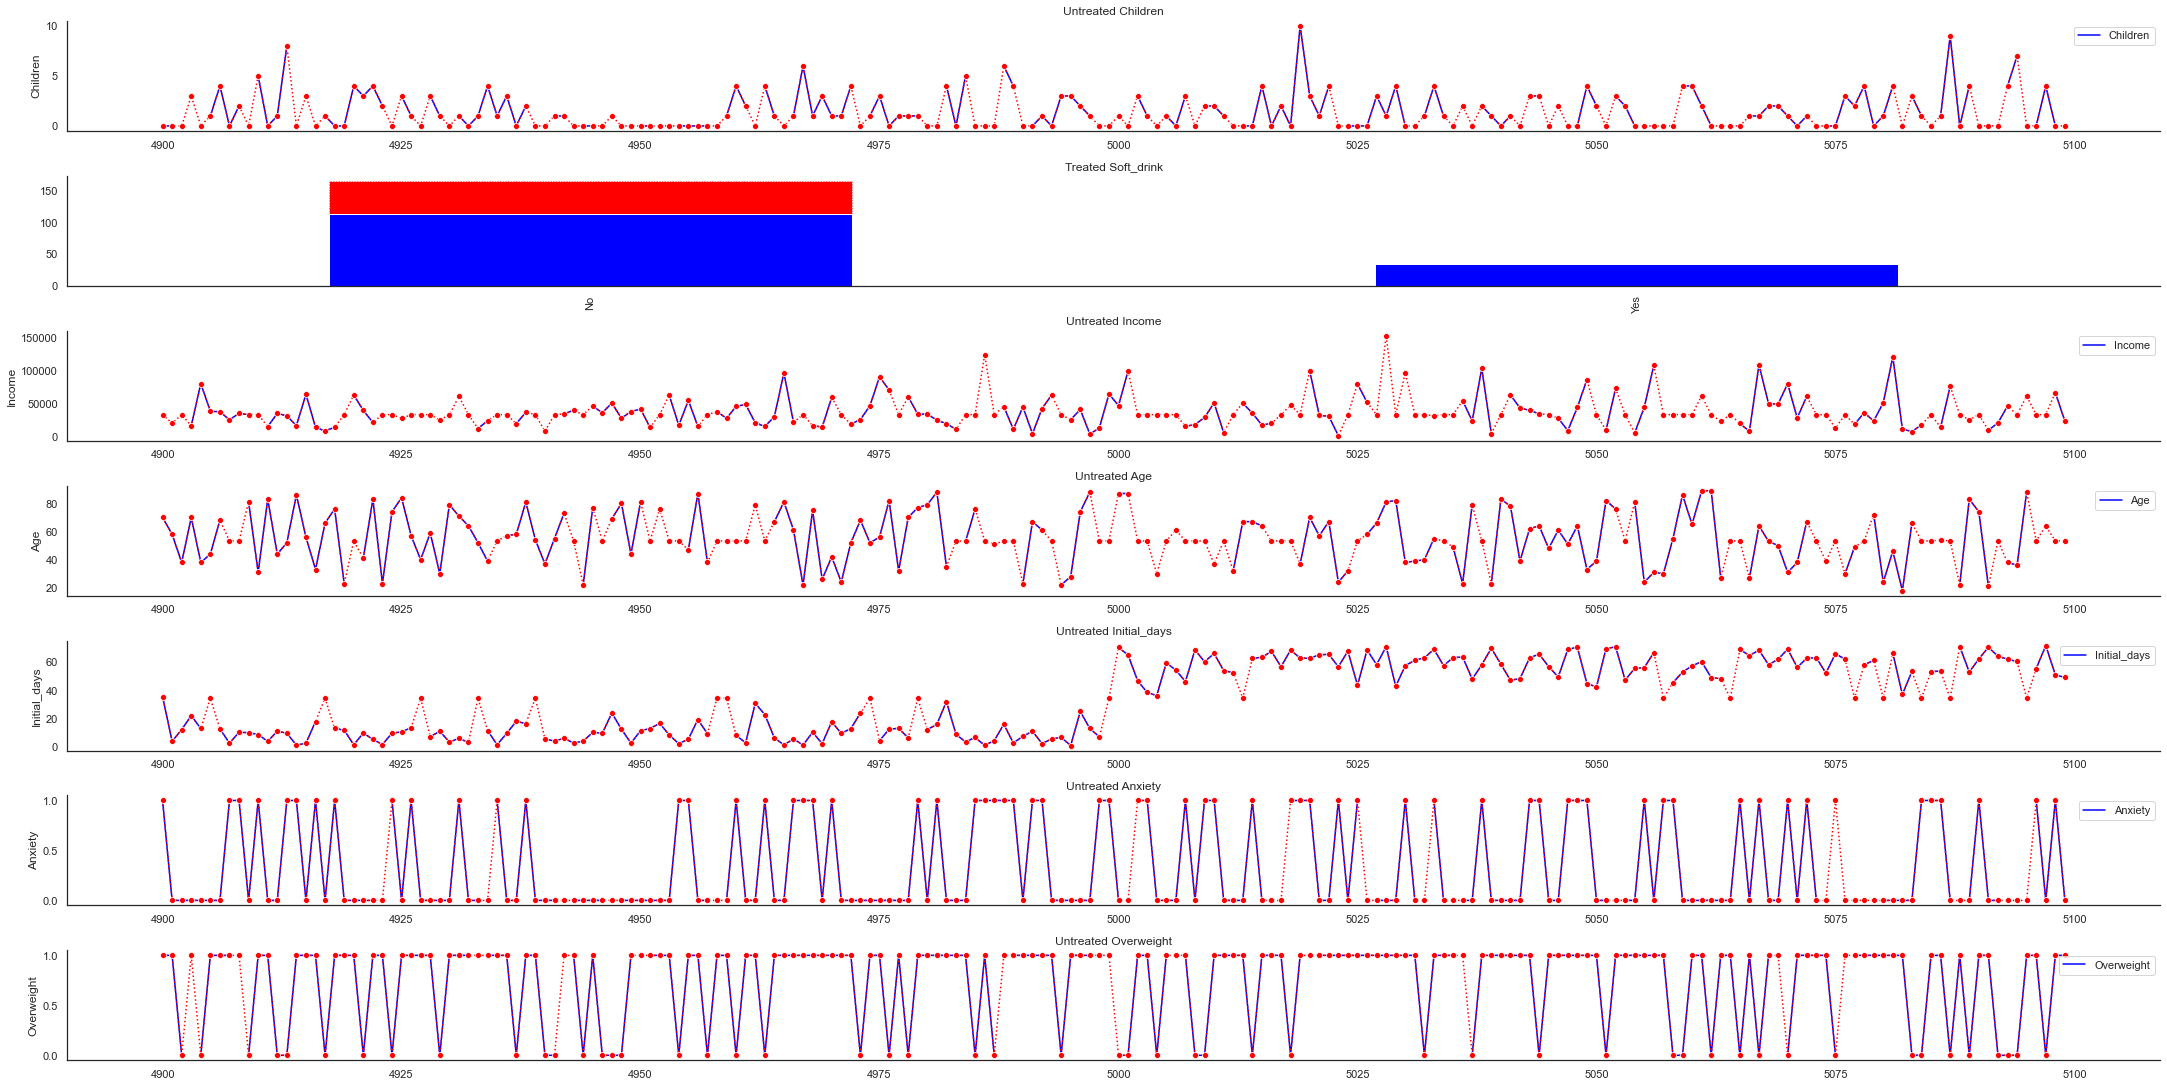

In [243]:
fig, axes = plt.subplots(len(missing_cols), 1, figsize=(30, 15))
rows = range(4900,5100)

for ax, col in zip(axes, missing_cols):
    try:
        _ = data=df[col].loc[rows].plot(title=f'Untreated {col}', color='blue', ax=ax)
        _ = sns.lineplot(data=treated_df[col].loc[rows], color='red', marker='o', linestyle='dotted', ax=ax)
    except TypeError:
        # display non-numeric data in a bar chart
        _ = treated_df[col].loc[rows].value_counts().plot(title=f'Treated {col}', kind='bar', color='red', linestyle='dotted', ax=ax)
        _ = df[col].loc[rows].value_counts().plot(color='blue', kind='bar', ax=ax)
        pass
        
    # compare Treated and Untreated data descriptions
    pd.DataFrame({f'Untreated {col}': df[col].describe(), f'Treated {col}': treated_df[col].describe()})
    
fig.tight_layout(pad=0.3)    

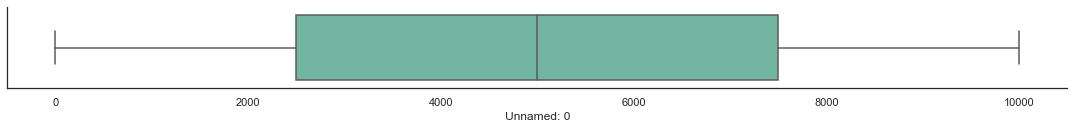

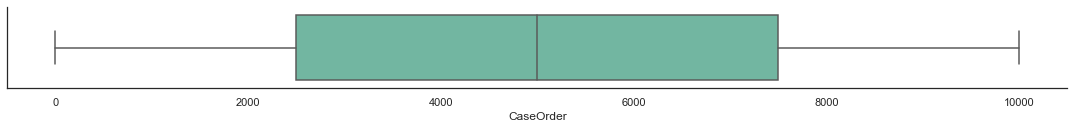

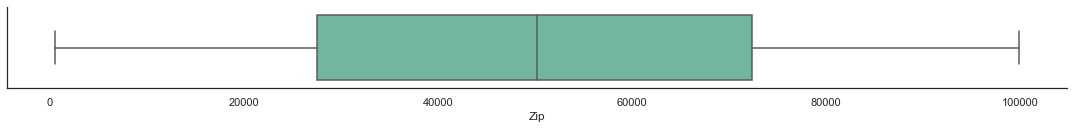

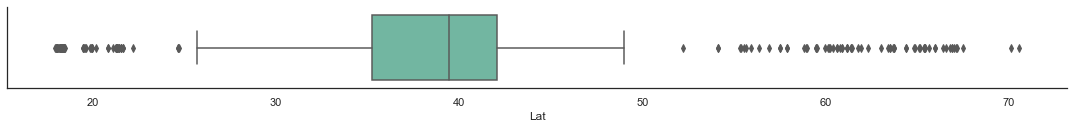

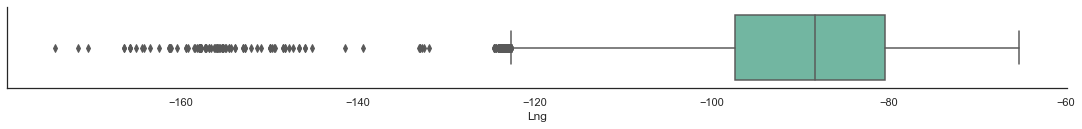

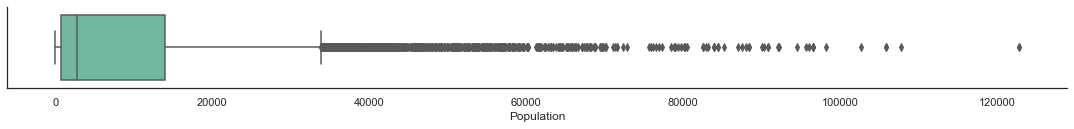

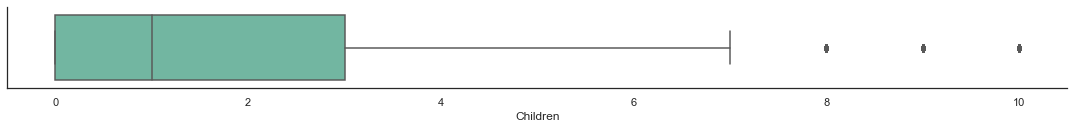

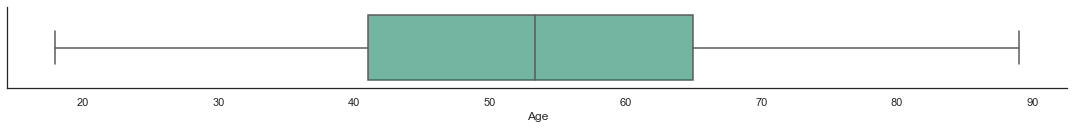

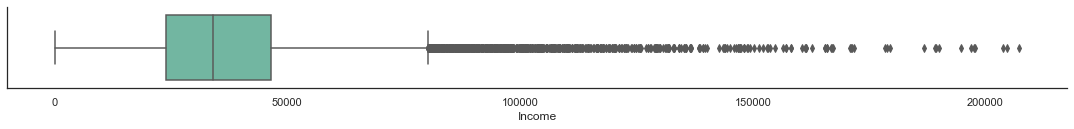

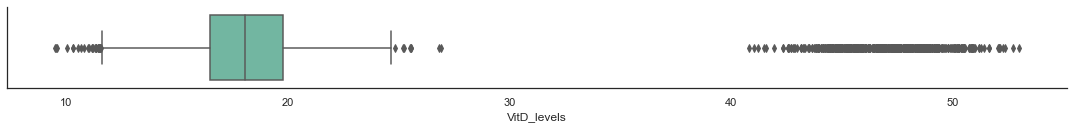

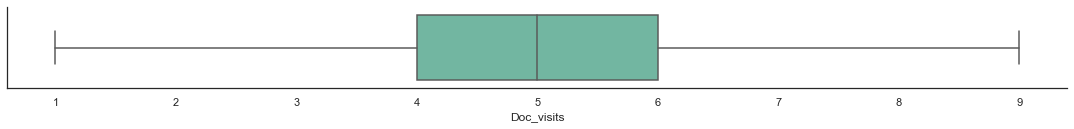

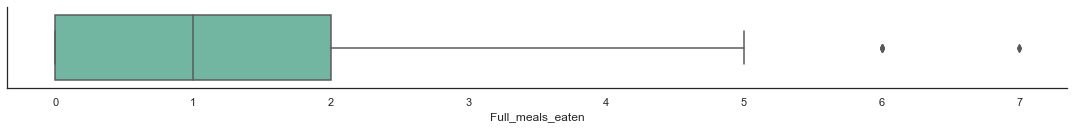

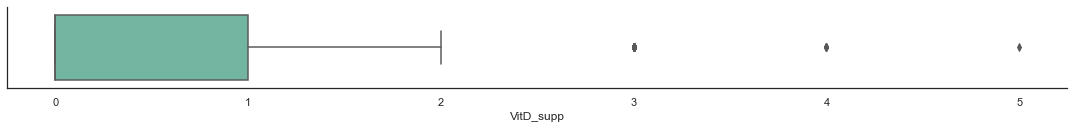

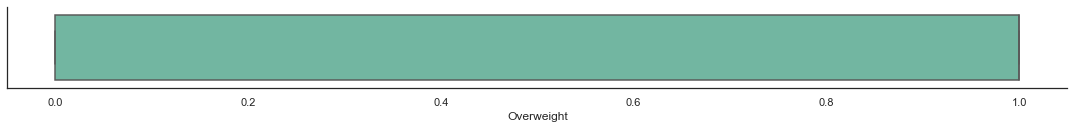

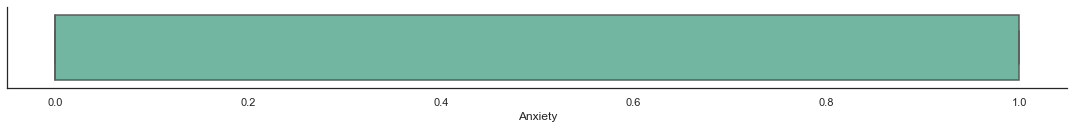

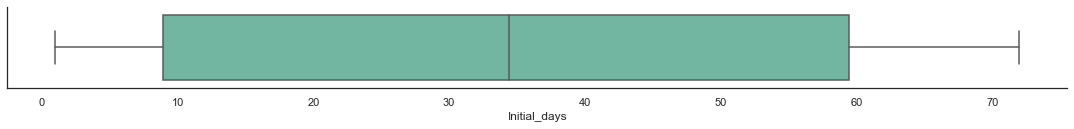

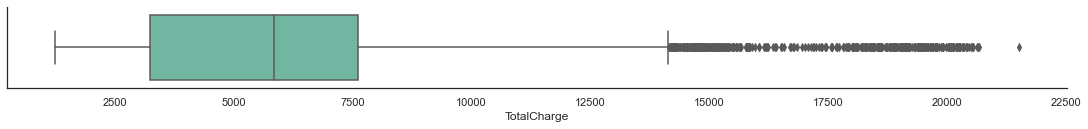

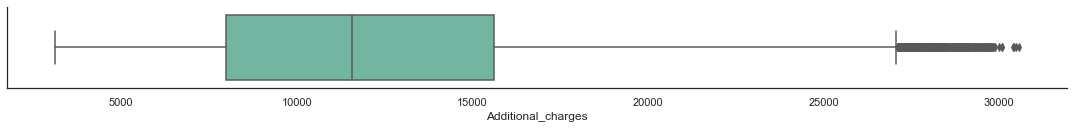

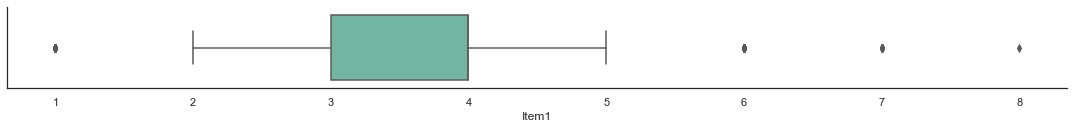

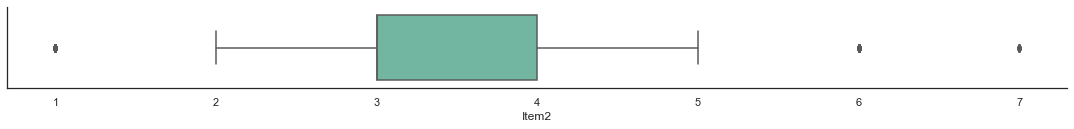

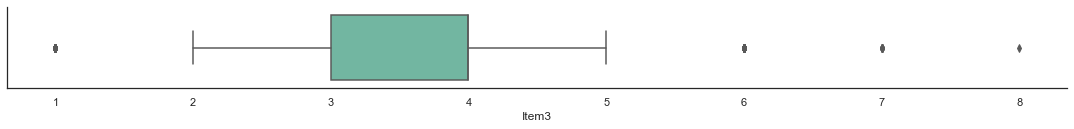

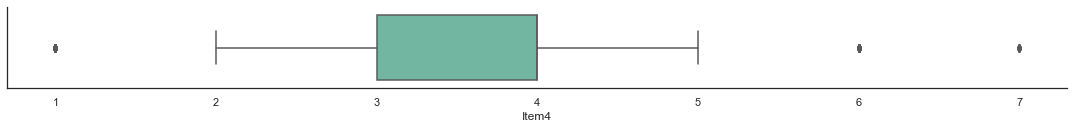

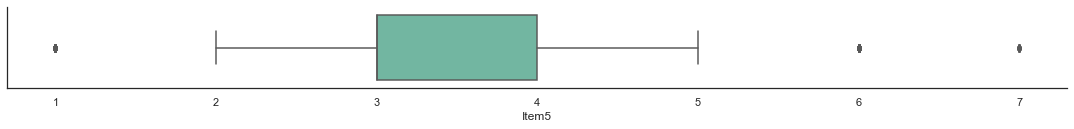

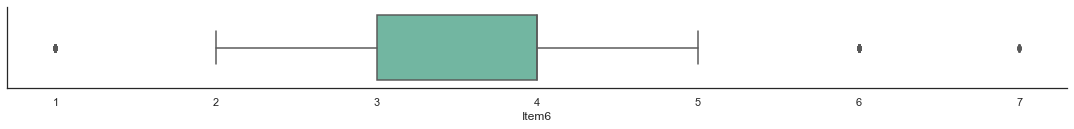

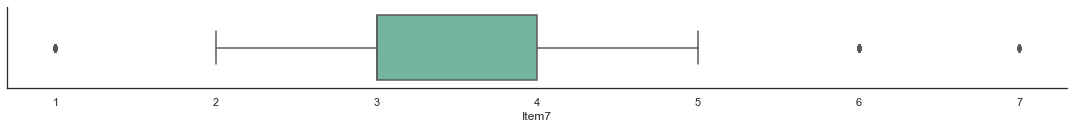

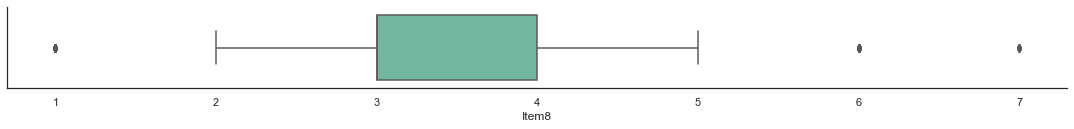

In [160]:
create_boxplots(treated_df)

### Outlier Treatment

In [171]:
# numerical columns with notable outliers outliers are allowed on columns not listed here
z_score_cols = ['Children', 'VitD_levels', 'Full_meals_eaten', 'VitD_supp', 'TotalCharge', 'Additional_charges']

treated_df['Children'].value_counts()

0.000     4468
1.000     1858
3.000     1113
2.000     1094
4.000      739
8.000      157
7.000      154
6.000      145
5.000      126
9.000       83
10.000      63
Name: Children, dtype: int64

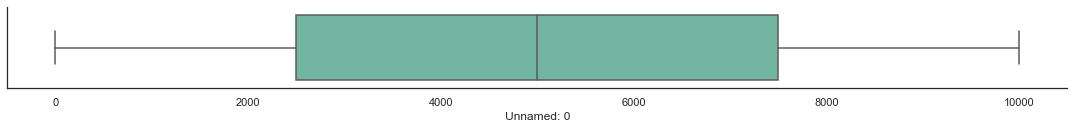

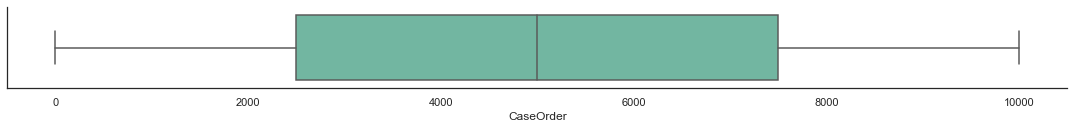

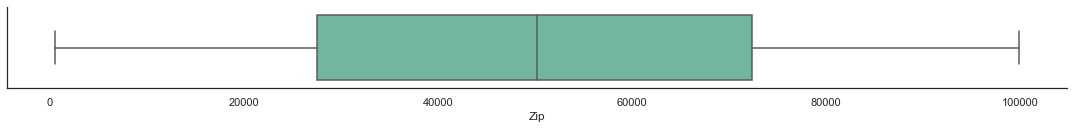

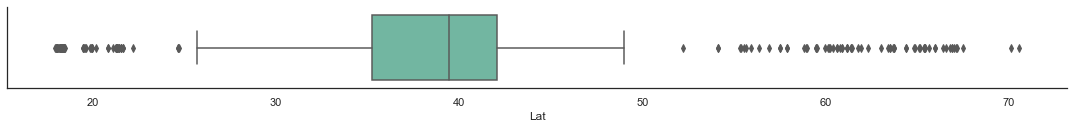

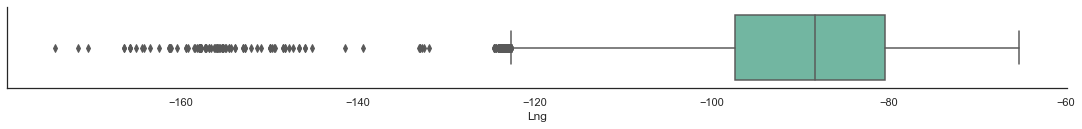

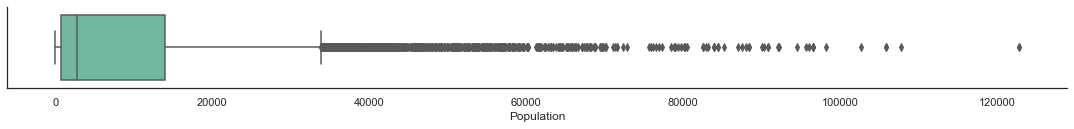

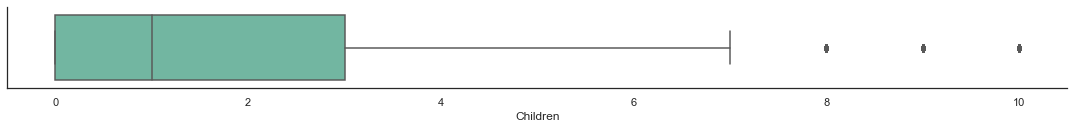

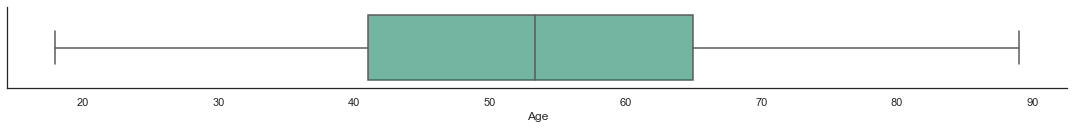

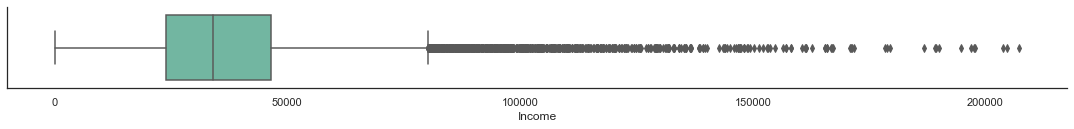

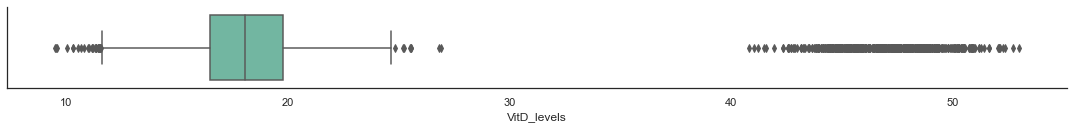

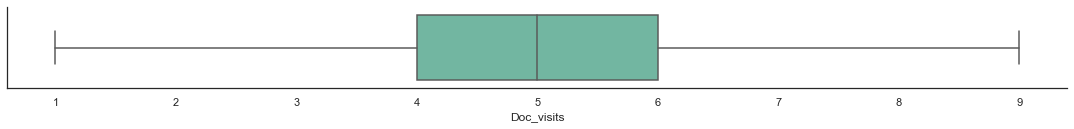

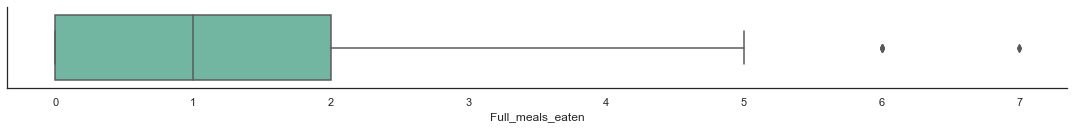

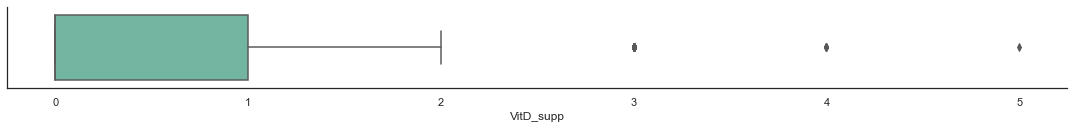

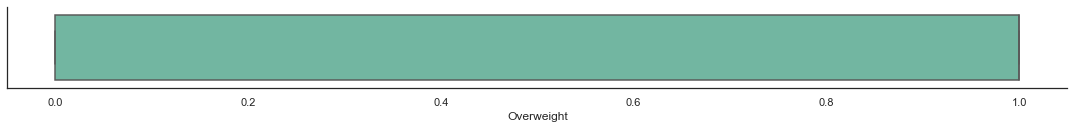

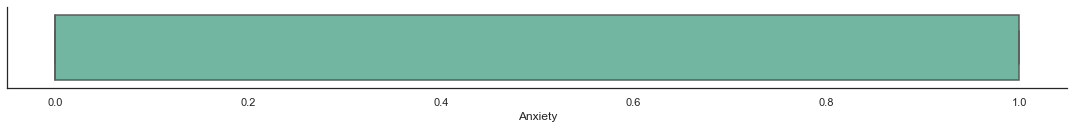

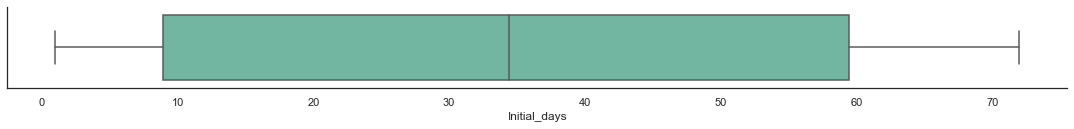

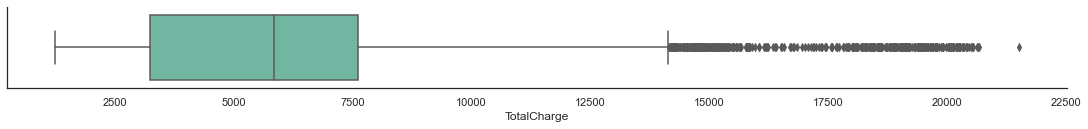

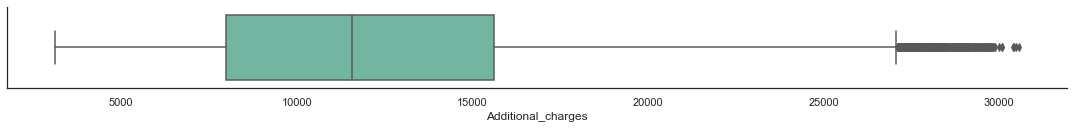

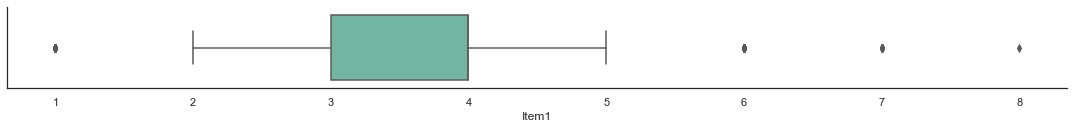

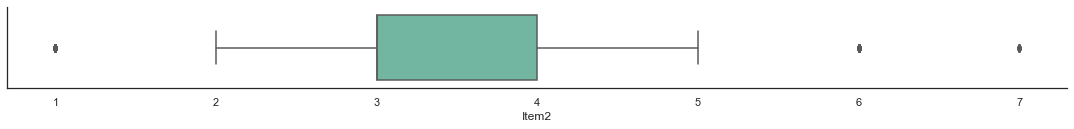

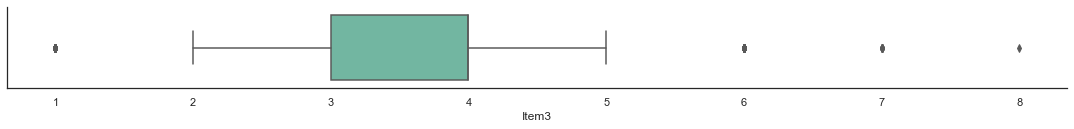

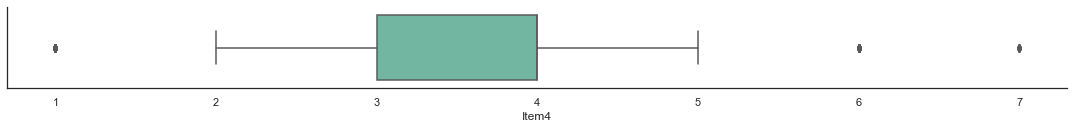

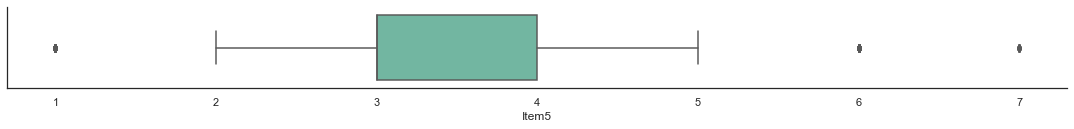

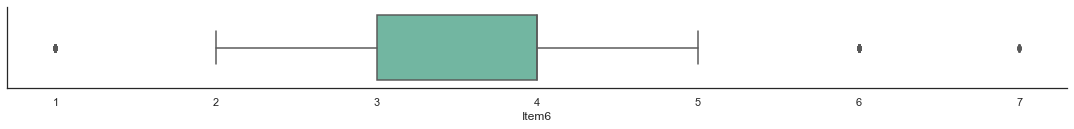

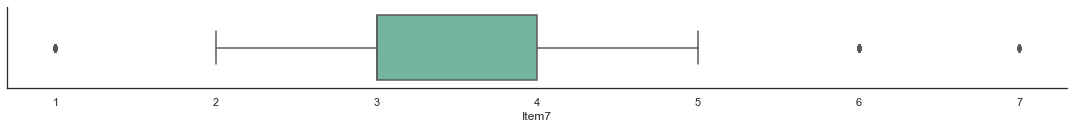

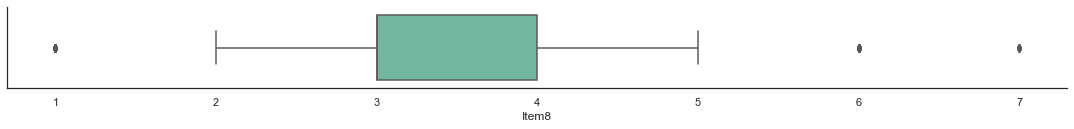

In [172]:
create_boxplots(treated_df)    

#### VitD_levels Outlier Exploration

In [244]:
# pd.set_option('display.max_rows', None)
# determine what correlation exists between Gender and VitD_levels
pd.DataFrame(treated_df[treated_df['Gender'] == 'Prefer not to answer'][['VitD_levels', 'Gender', 'Age']].round().sort_values(ascending=False, by=['VitD_levels', 'Age'])).head(10)

# determine what the average VitD_levels are by Gender and Age
treated_df[['VitD_levels', 'Gender', 'Age']].round().groupby(['Gender', 'Age']).agg({'VitD_levels': 'mean'}).sort_values('VitD_levels')

# determine what correlation exists between Gender and VitD_levels
vitd_df = df.copy()
vitd_df['Gender'] = df['Gender'].map({'Prefer not to answer': 0, 'Male': 1, 'Female': 2})
vitd_df.corr()['VitD_levels'].sort_values(ascending=False)

VitD_levels           1.000
TotalCharge           0.728
Age                   0.020
Additional_charges    0.016
Anxiety               0.014
Item4                 0.013
VitD_supp             0.010
Full_meals_eaten      0.009
Item6                 0.008
Item8                 0.004
Population            0.003
Item7                 0.002
Doc_visits            0.001
Income                0.000
Lng                  -0.000
Initial_days         -0.001
Unnamed: 0           -0.002
CaseOrder            -0.002
Children             -0.002
Item1                -0.004
Lat                  -0.004
Overweight           -0.008
Zip                  -0.008
Gender               -0.011
Item5                -0.012
Item3                -0.013
Item2                -0.018
Name: VitD_levels, dtype: float64

#### VitD_levels Outlier Treatment

In [174]:
# none - retaining existing values

#### Children Outlier Exploration

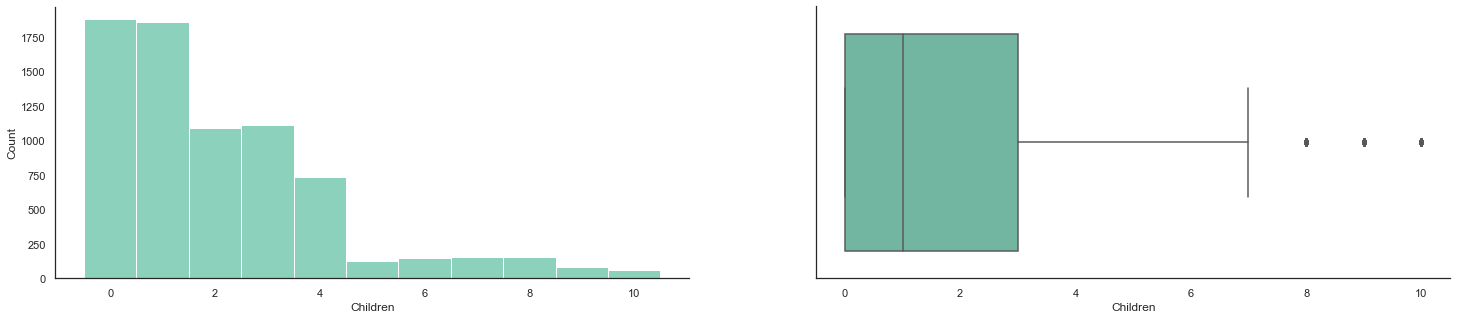

In [175]:
def create_hist_and_boxplots(df, col):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))
    sns.histplot(data=df, x=col, ax=axes[0], binwidth=1, discrete=True)
    sns.boxplot(data=df, x=col, ax=axes[1])
    
create_hist_and_boxplots(df, "Children")

#### Children Outlier Treatment

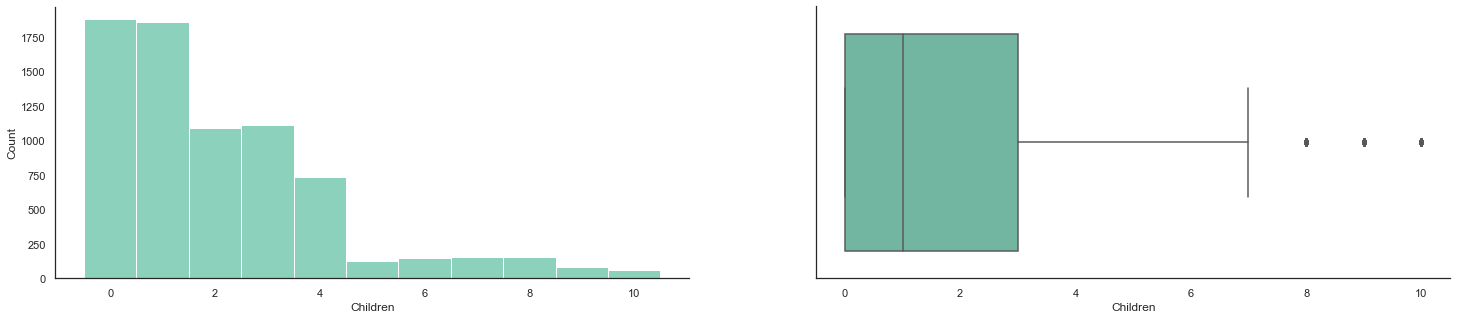

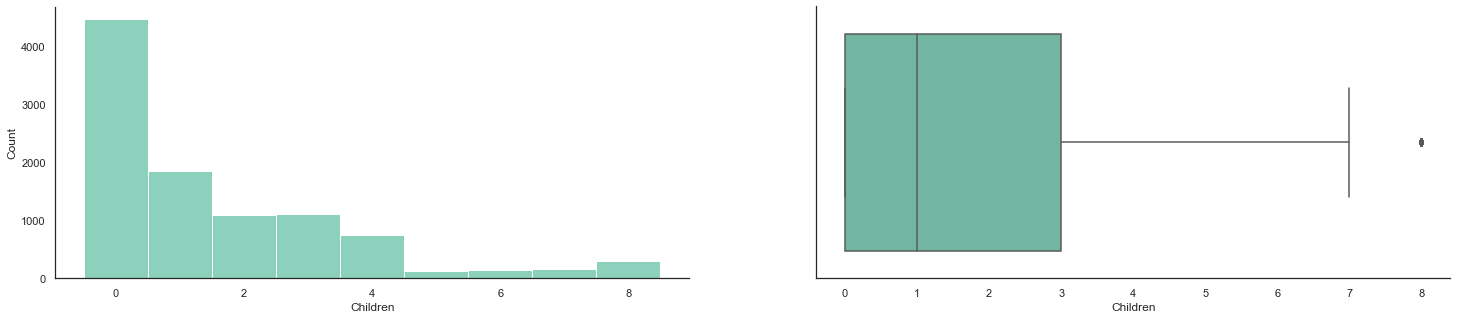

In [245]:
col = "Children"

children_z_df = abs(stats.zscore(df[col], nan_policy="omit"))
pd.DataFrame(df[children_z_df > 3][col].value_counts())

treated_df[col] = treated_df[col].astype("int")

# store maximum number of children that is a nonoutlier
max_num_children = df[children_z_df < 3][col].max()

# set the Children outliers to the max nonoutlier
treated_df.loc[treated_df[col] > max_num_children, col] = max_num_children

assert treated_df[col].max() == max_num_children

create_hist_and_boxplots(df, col)
create_hist_and_boxplots(treated_df, col)

#### Full_meals_eaten Outlier Exploration

In [ ]:
create_hist_and_boxplots(df, "Full_meals_eaten")

#### Full_meals_eaten Outlier Treatment

In [246]:
col = "Full_meals_eaten"

meals_z_df = abs(stats.zscore(df[col], nan_policy="omit"))
pd.DataFrame(df[meals_z_df > 3][col].value_counts())

treated_df[col] = treated_df[col].astype("int")

# store maximum number of children that is a nonoutlier
# store maximum number of children that is a nonoutlier
max_num_meals = df[children_z_df < 3][col].max()
med_num_meals = df[col].median()

# set the meals eaten outliers to the median value
treated_df.loc[meals_z_df > 3, col] = med_num_meals

assert treated_df[col].max() <= max_num_meals

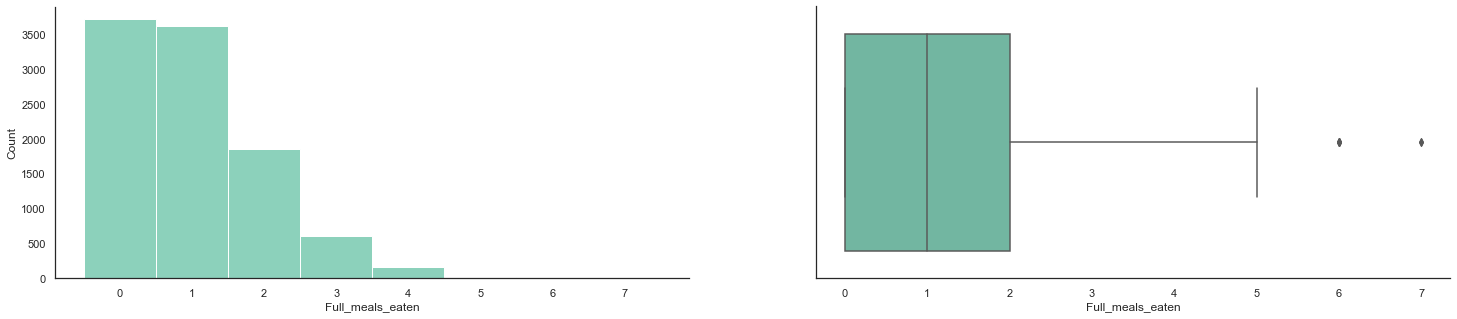

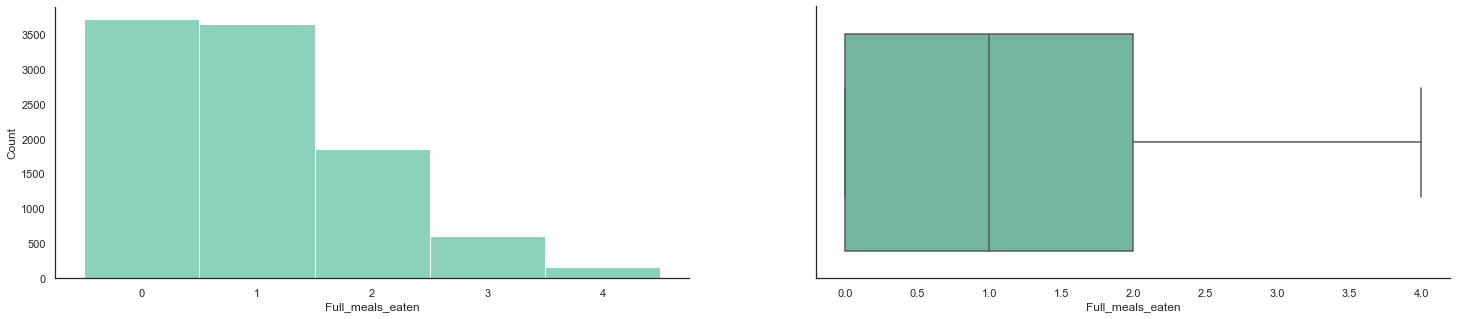

In [179]:
create_hist_and_boxplots(df, "Full_meals_eaten")
create_hist_and_boxplots(treated_df, "Full_meals_eaten")

In [ ]:
# from sklearn.impute import SimpleImputer
# children_mean = df["Children"].copy(deep=True)
# mean_imp = SimpleImputer(strategy='mean')
# # children_mean.iloc[:, :] = 
# # mean_imp.fit_transform(children_mean)

# x['foo'] = pd.DataFrame(mean_imp.fit_transform(children_mean))
# x['foo'].unique()

# data['age'] = mean_imp.transform(df["Children"]).ravel()
# imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
# imputer=imputer.fit(X[:,1:3])
# X[:,1:3]=imputer.fit)transform(X[:,1:3])

# # imr = Imputer(missing_values='NaN', strategy='median', axis=0)
# # imr = imr.fit(data[['age']])
# # data['age'] = imr.transform(data[['age']]).ravel()
# # type(pd.DataFrame(children_mean))


In [ ]:
# z_score_cols = ['Children', 'VitD_levels', 'Full_meals_eaten', 'VitD_supp']
# diabetes_mean = df[z_score_cols].copy(deep=True)
# mean_imputer = SimpleImputer(strategy='mean') 
# diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)
# diabetes_mean

In [ ]:
# diabetes_median = df[z_score_cols].copy(deep=True)
# mean_imputer = SimpleImputer(strategy='mean') 
# diabetes_median.iloc[:, :] = mean_imputer.fit_transform(diabetes_median)
# _ = diabetes_median.plot()

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median}

# nullity = df['Full_meals_eaten'].isnull()
# # +diabetes['Children'].isnull()

# for ax, df_key in zip(axes.flatten(), imputations):
#     print("DF", df_key)
#     imputations[df_key].plot(x='Full_meals_eaten', y='Full_meals_eaten', kind='scatter',
#         alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
#         colorbar=False, title=df_key)

In [ ]:
# import numpy as np
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit([[7]])

# X = [[np.nan]]
# print(imp_mean.transform(X))


# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# # imp_mean.fit([[7]])

# # Y = df["Children"].array.reshape(-1, 1)
# z = imp_mean.fit_transform(df["Children"].array.reshape(-1, 1))
# display(z)
# z.unique()

### Re-Expression Categories Treatment

In [311]:
# convert categorical string values to category data type

# convert "Soft_drink" nan's to 'No'
treated_df.loc[df["Soft_drink"].isna(), "Soft_drink"] = "No"

# convert "Overweight" float64's to Yes/No bools
treated_df["Overweight"] = treated_df["Overweight"].map({np.nan: 'No', 0: 'No', 'No': 'No', 1: 'Yes', 'Yes': 'Yes'})

treated_df["Anxiety"] = treated_df["Anxiety"].map({np.nan: 'No', 0: 'No', 'No': 'No', 1: 'Yes', 'Yes': 'Yes'})

# validate a value exists for each row
assert len(treated_df["Soft_drink"].isna().index) == len(treated_df.index)

# categorical columns and potential categorical columns
ctg_cols = ["Anxiety", "Area", "Timezone", "Employment", "Education",  "Marital", "Gender", "ReAdmis", "Soft_drink", "Initial_admin", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma", "Services"]

for col in ctg_cols:
    # print(treated_df[col].unique())
    print(f"--- COLUMN: '{col}' ---")    
    # sort the unique values and print 1 value per line
    # print(*np.sort(df[col].unique()), sep='\n', end="\n\n")

    # convert column to a category
    treated_df[col] = treated_df[col].astype("category")

    # confirm the values successfully converted     
    assert treated_df[col].dtype == "category"
    
    # report categorical counts   
    treated_df[col].value_counts()
    

ctg_cols = treated_df.select_dtypes('category').columns
treated_df["Overweight"].value_counts()

--- COLUMN: 'Anxiety' ---
--- COLUMN: 'Area' ---
--- COLUMN: 'Timezone' ---
--- COLUMN: 'Employment' ---
--- COLUMN: 'Education' ---
--- COLUMN: 'Marital' ---
--- COLUMN: 'Gender' ---
--- COLUMN: 'ReAdmis' ---
--- COLUMN: 'Soft_drink' ---
--- COLUMN: 'Initial_admin' ---
--- COLUMN: 'HighBlood' ---
--- COLUMN: 'Stroke' ---
--- COLUMN: 'Complication_risk' ---
--- COLUMN: 'Overweight' ---
--- COLUMN: 'Arthritis' ---
--- COLUMN: 'Diabetes' ---
--- COLUMN: 'Hyperlipidemia' ---
--- COLUMN: 'BackPain' ---
--- COLUMN: 'Allergic_rhinitis' ---
--- COLUMN: 'Reflux_esophagitis' ---
--- COLUMN: 'Asthma' ---
--- COLUMN: 'Services' ---


Yes    6395
No     3605
Name: Overweight, dtype: int64

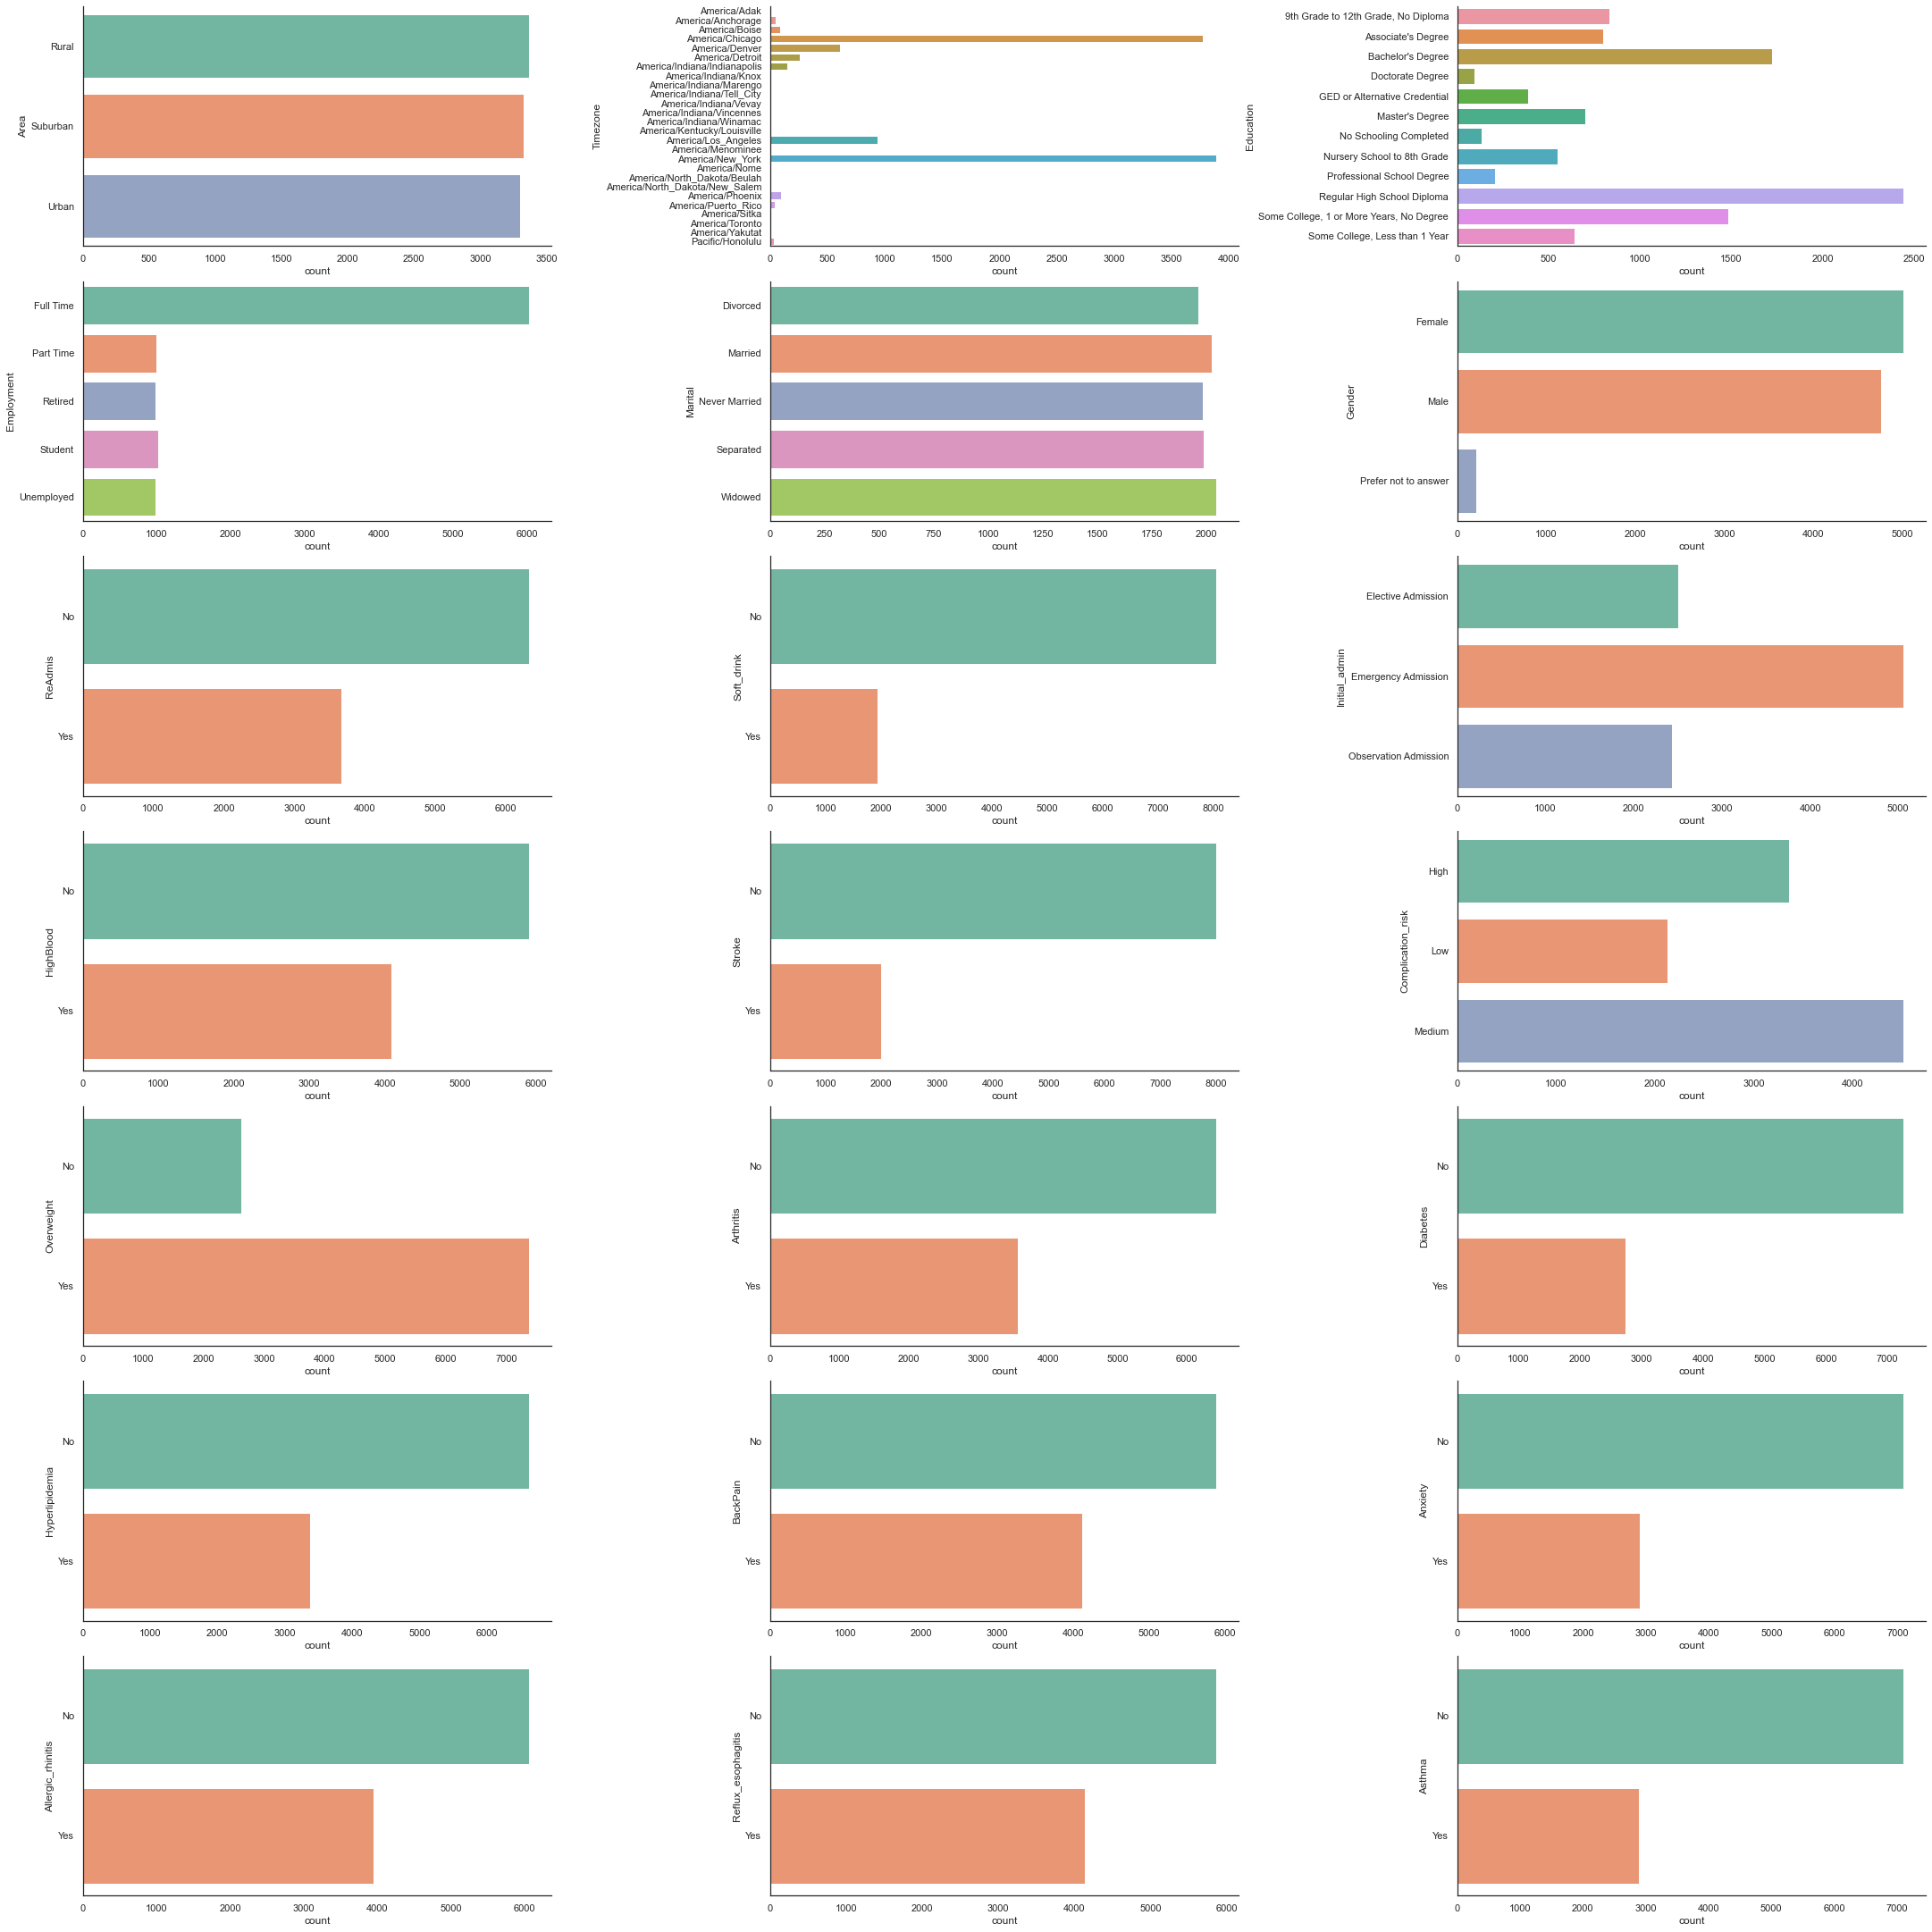

In [221]:
def plot_categorical_counts(df, cols):
    fig, axes = plt.subplots(len(cols) // 3, 3, figsize=(30,30))
    axes = axes.flatten()


    for ax, c in zip(axes, ctg_cols):
        try:
            sns.countplot(data=df, y=c, ax=ax)
        except Exception as e:
            print(f"error creating countplot for {c}", e)

    fig.tight_layout(pad=0.5)        
    
plot_categorical_counts(treated_df, ctg_cols)

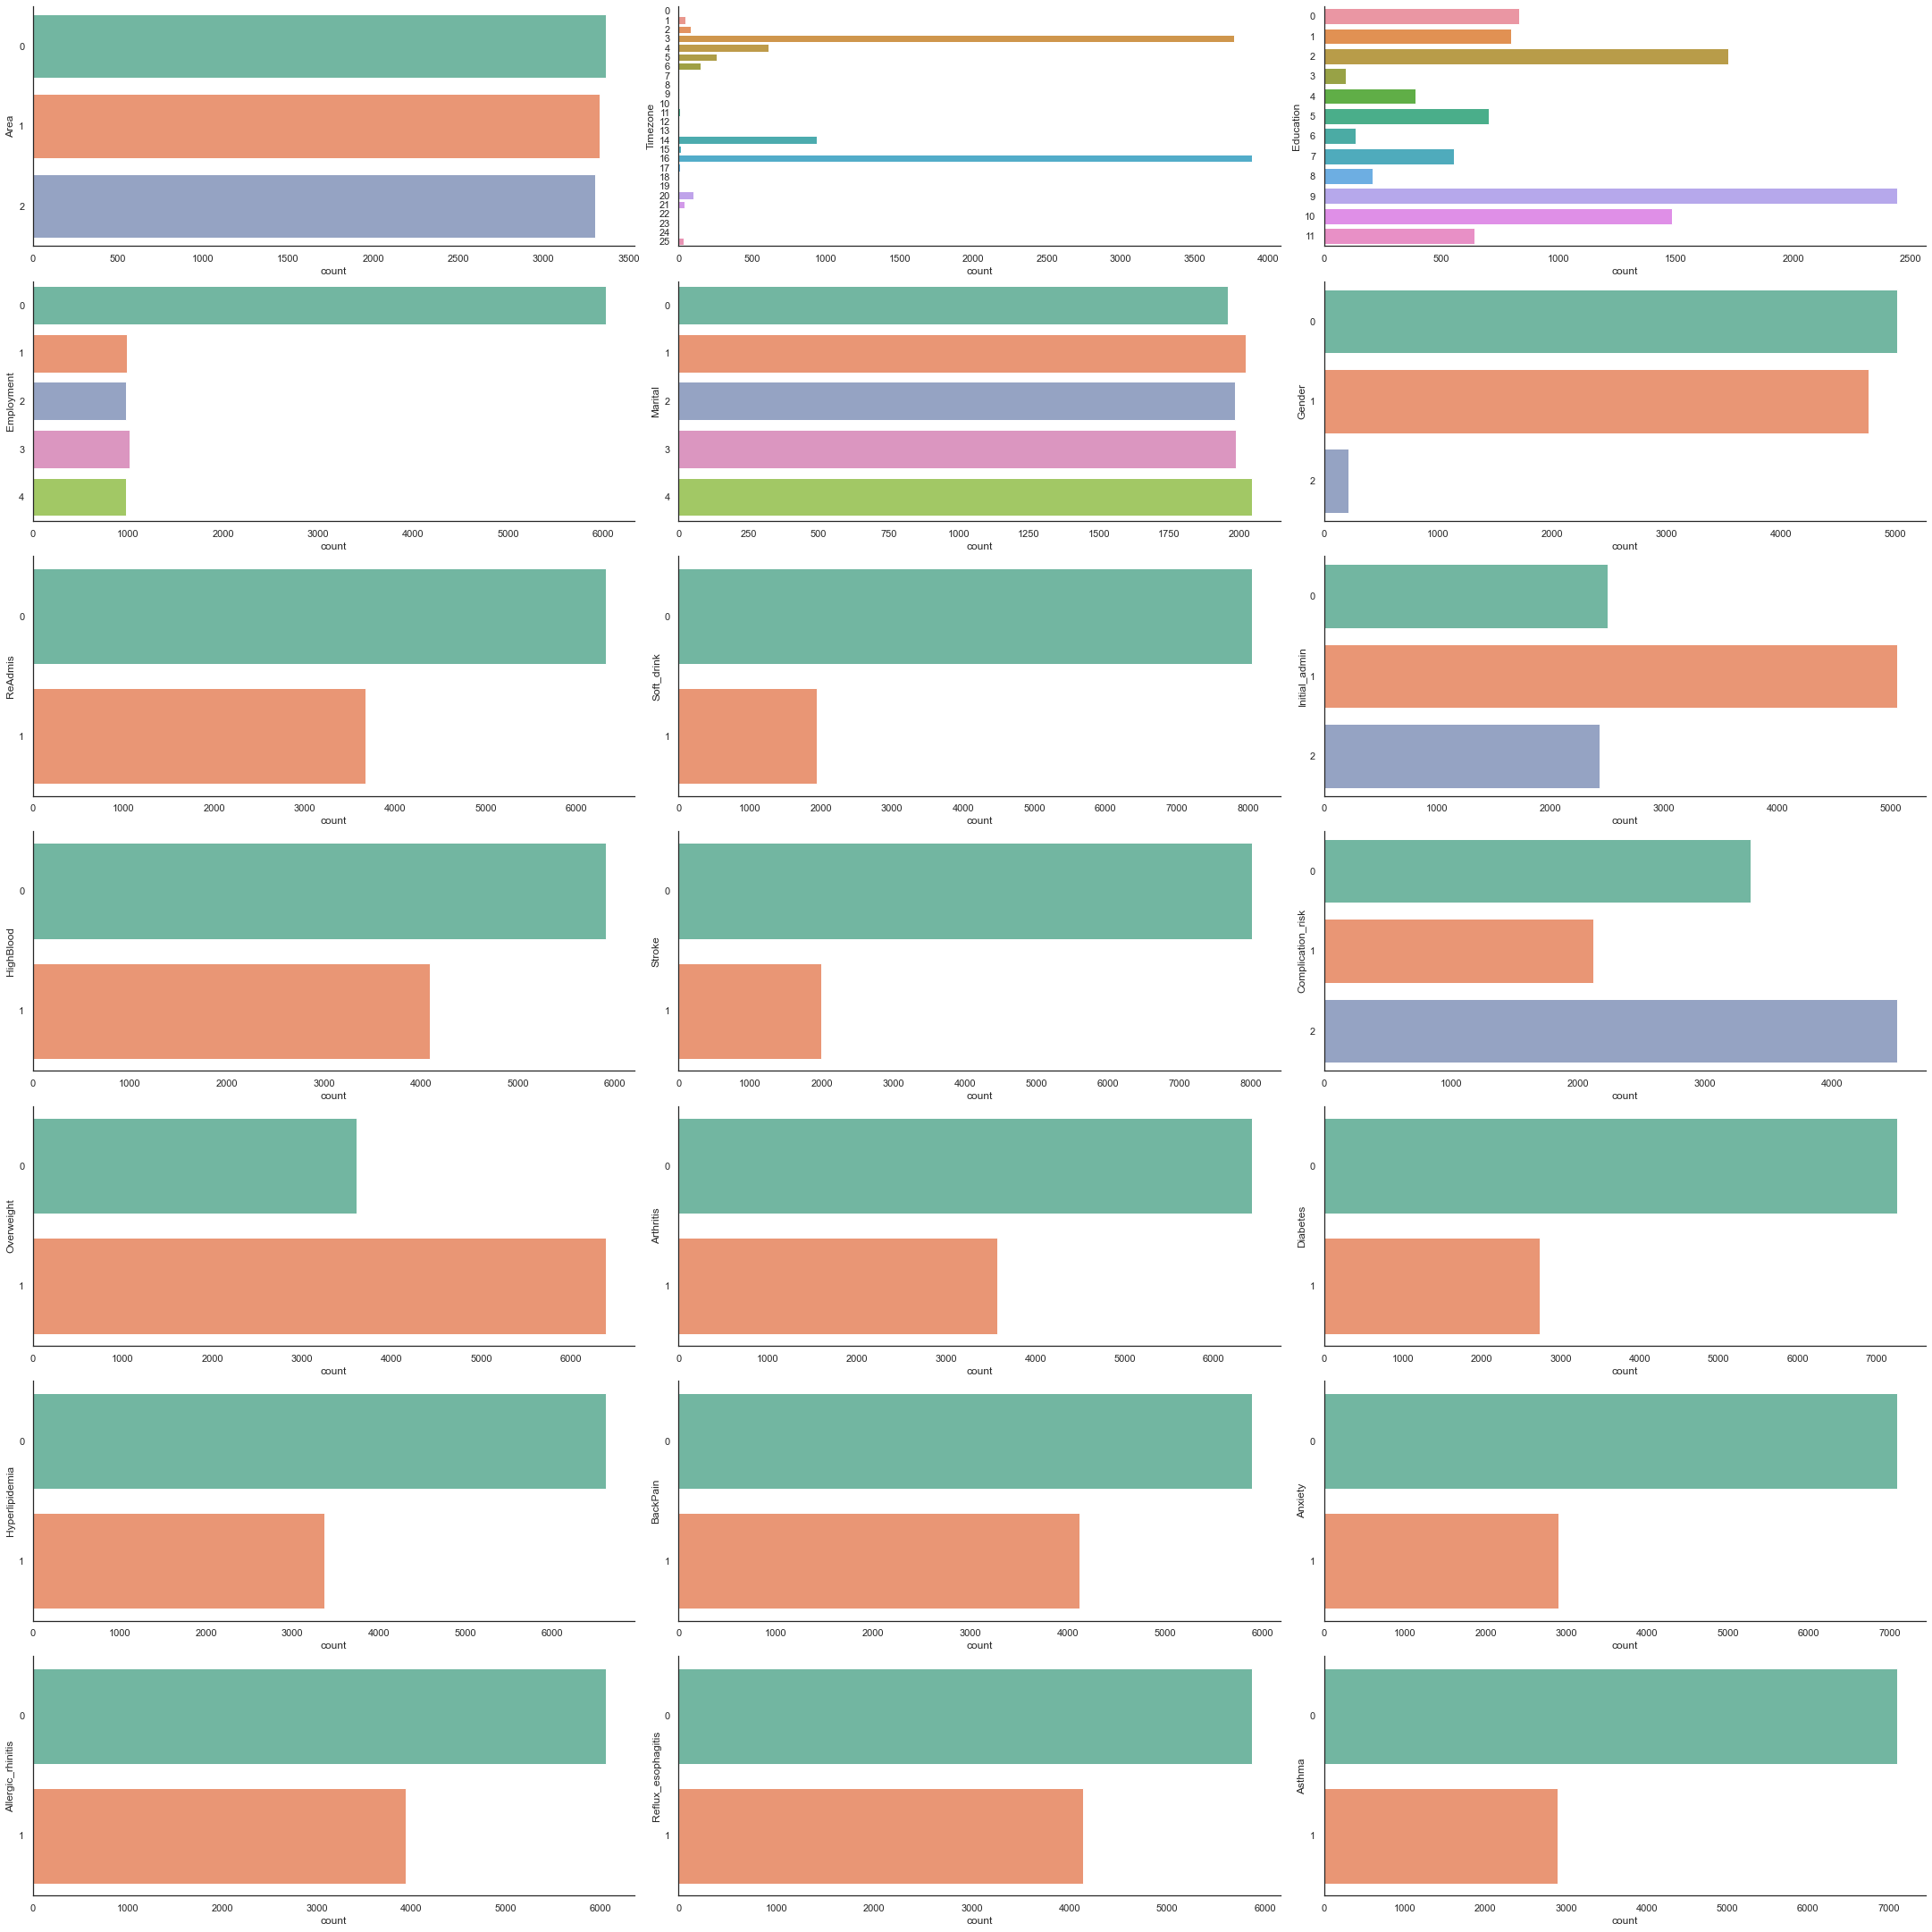

In [318]:
is_encoded = False

def create_category_encodings(df):
    encodings = {}
    encoded_df = df.copy()
    ctg_cols = df.select_dtypes(include=['category']).columns
    
    for col in ctg_cols:
        print(col)
        le = LabelEncoder()
        cats = df[col].unique()
        le.fit(cats)
        encodings[col] = le
        encoded_df[col] = le.transform(encoded_df[col])
        print(f"category: {col} succesfully encoded")
        
    return encodings, encoded_df, ctg_cols


# print(treated_df.select_dtypes(include=['category']))

treated_df.columns[treated_df.dtypes == 'category'].any()
# df.columns[df.dtypes=='object']


# if len(df.select_dtypes(include=['category'])):
#     print("have categories")
if treated_df.columns[treated_df.dtypes == 'category'].any():
    category_df = treated_df.copy()
    # display(category_df["Soft_drink"])
    encodings, encoded_df, ctg_cols = create_category_encodings(category_df)
    treated_df = encoded_df

# ctg_cols
plot_categorical_counts(treated_df, ['Area', 'Timezone', 'Education', 'Employment', 'Marital', 'Gender',
    'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services'])

# treated_df[['Area', 'Timezone', 'Education', 'Employment', 'Marital', 'Gender',
#     'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
#        'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
#        'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
#        'Reflux_esophagitis', 'Asthma', 'Services']]

In [351]:
def write_encodings_csv(encodings):
    encodings_dict = {}
    
    for k,v in encodings.items():
        encodings_dict[k] = {}
        for index, c in enumerate(v.classes_):
            encodings_dict[k][index]=c
        
    output_df = pd.DataFrame.from_dict(encodings_dict, orient="index")
    output_df.index.name='feature'
    output_df.to_csv("encodings.csv", index=True)
    
write_encodings_csv(encodings)

### Other Data Cleaning Treatment

#### Drop 'Unnamed: 0' column

In [ ]:
# trimwhite space from string columns
str_cols = treated_df.select_dtypes('object')
treated_df[str_cols.columns] = str_cols.apply(lambda s: s.str.strip())

In [ ]:
treated_df = treated_df.select_dtypes('object').apply(lambda s: s.str.strip())

In [ ]:
# Verify these columns are the same, if so drop the "Unnamed: 0" column
if treated_df["Unnamed: 0"].equals(treated_df["CaseOrder"]):
    print("Dropping 'Unnamed: 0' column")
    treated_df = treated_df.drop(columns="Unnamed: 0", axis=1)    

#### Round Age Values

In [ ]:
treated_df['Age'] = treated_df['Age'].astype('int')
assert treated_df['Age'].dtype == 'int'

## D2: Justification of Mitigation Methods

## D3: Summary of the Outcomes

In [ ]:
create_boxplots(treated_df)

## D4: Mitigation Code 

In [ ]:
treated_df.to_csv('clean_data.csv', index=False)
write_encodings_csv(encodings)

## D5: Clean Data

## D6: Limitations

## D7: Impact of the Limitations

## E1. Principal Components

In [ ]:
pca_df = treated_df.copy()
treated_pca_df = treated_df.copy()
pca_df.describe(exclude='number')
pca_df.shape

# str_cols = pca_df.drop([treated_df.select_dtypes('object').columns])
# pca_treated_df.drop

### Correlation Heatmap

In [ ]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
fig, ax = plt.subplots(figsize=(25,10))
corr_df = pca_df.corr()

# mask part of the matrix
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_df, center=0, cmap=cmap, annot=True, fmt=".1f", vmin=-1.0, vmax = 1.0, mask=mask, linewidths=.5, ax=ax)

In [ ]:
mask2 = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask2).abs()

# Find columns that meet a high correlation threshold
drop_cols = [col for col in tri_df.columns if any(tri_df[col] > 0.90)]

# Removing highly correlated features
print(f"Dropping highly correlated column(s): {drop_cols}")
treated_pca_df = treated_pca_df.drop(drop_cols, axis=1, errors='ignore')
treated_pca_df.shape

In [ ]:
def create_category_encodings(df):
    encodings = {}
    encoded_df = df.copy()
    
    for col in  df.select_dtypes(include=['category']):
        le = LabelEncoder()
        cats = pca_df[col].unique()
        le.fit(cats)
        encodings[col] = le
        encoded_df[col] = le.transform(encoded_df[col])    
        
    return encodings, encoded_df

encodings, encoded_df = create_category_encodings(pca_df)

treated_pca_df = encoded_df
treated_pca_df.head()

# store the string columns in a separate dataframe
str_cols = treated_df.select_dtypes('object')
str_cols.columns

# drop the string columns
treated_pca_df = treated_pca_df.drop(str_cols.columns, axis=1, errors='ignore')
treated_pca_df.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

predict_df = treated_pca_df.copy()

predict_df.head()
predict_df.describe()
y = predict_df['ReAdmis']
X = predict_df.drop('ReAdmis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
svc = SVC()
svc.fit(X_train, y_train)

print(accuracy_score(y_test, svc.predict(X_test)))
print(accuracy_score(y_train, svc.predict(X_train)))

In [ ]:
treated_pca_df.std()

In [ ]:
treated_pca_df.var()

# normalized
# treated_pca_df.var() /  treated_pca_df.mean()

In [ ]:
patient_features = [
    "Additional_charges",
    "Age",
    "Allergic_rhinitis",
    "Anxiety",
    "Area",
    "Arthritis",
    "Asthma",
    "BackPain",
    "Children",
    "Complication_risk",
    "Diabetes",
    "Doc_visits",
    "Education",
    "Employment",
    "Full_meals_eaten",
    "Gender",
    "HighBlood",
    "Hyperlipidemia",
    "Initial_admin",
    "Initial_days",
    "Item1",
    "Item2",
    "Item3",
    "Item4",
    "Item5",
    "Item6",
    "Item7",
    "Item8",
    "Overweight",
    "ReAdmis",
    "Reflux_esophagitis",
    "Services",
    "Soft_drink",
    "Stroke",
    "TotalCharge",
    "VitD_levels",
    "VitD_supp",
]

treated_pca_df[patient_features].var()

In [ ]:
treated_pca_df = treated_pca_df[patient_features]

feature_variance = treated_pca_df.var(numeric_only=True).sort_values()
display("Variance Across Remaining Features", feature_variance)

high_variance_features = list(feature_variance[-10:].index)
display("10 Features With Significant Variance", feature_variance[high_variance_features])
high_variance_features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt_df = treated_pca_df.copy()

# Feature selector that removes all low-variance features based on a variance threshold.
sel = VarianceThreshold(threshold=.75)

sel.fit_transform(vt_df)
# sel.fit_transform(vt_df / vt_df.mean())
# boolean array of shape [# input features], where an element is True if its corresponding feature is selected for retention.
mask = sel.get_support()

# retained columns
retain_cols = vt_df.loc[:, mask].columns

# dropped columns
drop_cols = vt_df.loc[:, ~mask].columns

pd.DataFrame({'retained': retain_cols})
pd.DataFrame({'dropped': drop_cols})

# variances are too low for most medical/health-related features and result in dropping too many relevant columns.
# Will use methods other than VarianceThreshold for feature selection

In [ ]:
def create_na_mask(df, pct):
    return df.isna().sum() / len(df) < pct

create_na_mask(treated_pca_df, 0.1)

In [ ]:
sns.pairplot(treated_pca_df.head(5))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
std_df = scaler.fit_transform(treated_pca_df)

pca = PCA()
pca.fit(std_df)
print(pca.explained_variance_ratio_, end="\n\n")
print(pca.explained_variance_ratio_.cumsum(), end="\n\n")
print(pca.components_, end="\n\n")
# print(pca.fit_transform(std_df))

#### An optimal number of components

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()), ("reducer", PCA())])

# Fit the pipe to the data
pipe.fit(treated_pca_df)
pca = pipe.steps[1][1]
num_components = len(pca.components_)
var = pipe.steps[1][1].explained_variance_ratio_

display(pd.DataFrame(pca.components_.T, index=[f"PC{i}" for i in range(1, num_components +1)] ))

# fig, ax = plt.subplots(figsize=(25,10))
# # display(pd.DataFrame(pca.components_.T, index=treated_pca_df.columns))
# display(pd.DataFrame(pca.components_.T, columns=treated_pca_df.columns, index=treated_pca_df.columns))
# # display(foo.corr())
# # corr_df = pfoo.corr()
# display(sns.heatmap(foo, center=0, cmap=cmap, annot=True, fmt=".1f", vmin=-1.0, vmax = 1.0,   linewidths=.5))

fig, axs = plt.subplots(1, 1, figsize=(15, 5))
axs.set_title('scree plot graph')
sns.lineplot(data=var, ax=axs)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.xticks(np.arange(0, num_components, 1))

plt.show()

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()), ("reducer", PCA(n_components=5))])

# Fit the pipe to the data
pipe.fit(treated_pca_df)
print(len(pipe.steps[1][1].components_))
var = pipe.steps[1][1].explained_variance_ratio_
plt.plot(var)
# pipe.steps[1][1]

print(pipe.steps[1][1].components_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=2))
# estimator = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
estimator = RandomForestClassifier(max_depth=2, random_state=0)

# create a RFE that will using Logistic Regression to select the Top 5 features based on importance/relevance
# rfe = RFE(estimator, n_features_to_select=7, random_state=0)

# y = treated_pca_df['ReAdmis']
# X = treated_pca_df.drop('ReAdmis', axis=1)

# X_train_std = scaler.fit_transform(X_train)
# svc = SVC()
# svc.fit(X_train, y_train)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rfe_df = treated_pca_df
X, y = rfe_df.loc[:, ~rfe_df .columns.isin(['ReAdmis'])], rfe_df['ReAdmis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# rfe.fit(X_train, y_train)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

rfe = RFE(pipe.steps[1][1], n_features_to_select=7)
rfe.fit(X_train, y_train)
print(rfe)

# display("Features", list(X.columns), "Feature Ranking", rfe.ranking_, "Feature Relevance", rfe.support_)

# merge our ranking scores with feature names
feature_ranking_df = pd.DataFrame(zip(X.columns, rfe.ranking_)).sort_values(1)
display("Feature Ranking", feature_ranking_df)
# 	Additional_charges	1
# 1	Age	1
# 33	TotalCharge	1
# 26	Item7	1
# 23	Item4	1
# 19	Initial_days	1
# 34	VitD_levels	1

# 5	VitD_supp	1
# 32	Stroke	1
# 2	Allergic_rhinitis	1
# 25	Item6	1
# 19	Initial_days	1
# 16	HighBlood	1
# 6	Asthma	1

# 32	Stroke	1
# 2	Allergic_rhinitis	1
# 26	Item7	1
# 19	Initial_days	1
# 6	Asthma	1
# 18	Initial_admin	1
# 16	HighBlood	1

# 19	Initial_days	1
# 2	Allergic_rhinitis	1
# 29	Reflux_esophagitis	1
# 16	HighBlood	1
# 5	Arthritis	1
# 6	Asthma	1
# 25	Item6	1

In [ ]:
# normalize the data
treated_pca_normalized=(treated_pca_df-treated_pca_df.mean())/treated_pca_df.std()
pca = PCA(n_components=treated_pca_normalized.shape[1])
pca.fit(treated_pca_normalized)
pca2 = pd.DataFrame(pca.transform(treated_pca_normalized))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

cov_matrix = np.dot(treated_pca_normalized.T, treated_pca_normalized) / treated_pca_normalized.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show() 

loadings = pd.DataFrame(pca.components_.T, index=treated_pca_normalized.columns)
loadings

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(treated_pca_df)

In [ ]:
tsne_obj[1:4,:]

In [ ]:
treated_pca_df.boxplot()

In [ ]:
# sns.pairplot(treated_df, hue="Gender", diag_kind='hist')

sns.pairplot(pca_df.head(10), hue="Gender")

In [ ]:
pca_df.columns

In [ ]:
y = pca_df['ReAdmis']
# X = pca_df.drop('ReAdmis', axis=1)

# df.drop(non_numeric, axis=1)
foo = pca_df[pca_df.select_dtypes(include=['int64', 'float64']).columns]
X = pca_df.drop('ReAdmis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

## E2. Criteria Used

## E3. Benefits

# Part IV. Supporting Documents
---

## F. Video

## G. Web Sources

- https://stackoverflow.com/q/47139203
- https://stackoverflow.com/a/57649212
- https://datascience.stackexchange.com/questions/60955/how-to-check-all-values-in-particular-column-has-same-data-type-or-not
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
- https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.htmlhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
- https://stackoverflow.com/questions/43392588/how-to-increase-the-figure-size-of-dataframe-hist-for-pandas-0-11-0
- https://numpy.org/doc/stable/reference/generated/numpy.all.html
- https://stackoverflow.com/a/53585379
- https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
- https://stackoverflow.com/questions/43392588/how-to-increase-the-figure-size-of-dataframe-hist-for-pandas-0-11-0
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
- https://datatofish.com/check-nan-pandas-dataframe/
- https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
- https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html
- https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

## H. Sources/References

In [ ]:
df.corr()
# Create the correlation matrix
corr = df.corr()

# Draw the heatmap
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

In [ ]:
plt.hist(df['Additional_charges'])
plt.title('Additional_charges')


In [ ]:
# # Create statistics dictionary for aggregation function
# statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# # Group by ride_id and compute new statistics
# ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# # Find duplicated values again
# duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
# duplicated_rides = ride_unique[duplicates == True]

# # Assert duplicates are processed
# assert duplicated_rides.shape[0] == 0